# Customer Segmentation for a Wholesale Distributor

In [1]:
import warnings
warnings.filterwarnings('ignore')

The warnings module to suppress the display of warning messages during program execution. 
Specifically, this means that any warning messages that would typically be displayed during program execution will be suppressed and not shown to the user.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

LR, KNN = LinearRegression(), KNeighborsClassifier()

# 1. Exploratory Data Analysis (EDA)

###### Used pandas library to read data from an Excel file named "iris.xlsx" and store it in a variable called iris. 
The head() function is used to display the first few rows of the DataFrame.(Provides a quick look at the structure and contents of the dataset.)


In [3]:
wc_data = pd.read_csv("Wholesale customers data.csv")
wc_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


The above code is using the pandas library to read data from an csv file named "Wholesale customers data.csv" into a DataFrame called iris. 

The "head()" method is used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [4]:
wc_data.shape

(440, 8)

The "wc_data.shape" is used to get dimensions, and for understanding the size of dataset

Where the first element is the number of rows, and the second element is the number of columns in the DataFrame. 

For example, the result is (440, 8), it means there are 440 rows and 8 columns in the iris DataFrame.


In [5]:
wc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


The "wc_data.info()" provides a short summary of the DataFrame iris, and to get a quick understanding of the dataset's structure, data types, and whether there are any missing values in the data set.

By providing information regarding :
The total number of entries (rows), data types of each column, number of non-null values in each column, and memory usage.


In [6]:
wc_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

"wc_data.isnull().sum()" is used to get the count of the null/NaN values in each column of the iris dataframe.

In [7]:
NV= (wc_data.isnull().sum() / len(wc_data)*100)
NV

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

Here the code provides the sum of null values in percentage.

No null value in provided Wholesale customer dataset.

In [8]:
print(wc_data.groupby('Channel').size())

Channel
1    298
2    142
dtype: int64


The provided wholesale Customer dataset contains three types of regions 1, 2, 3.

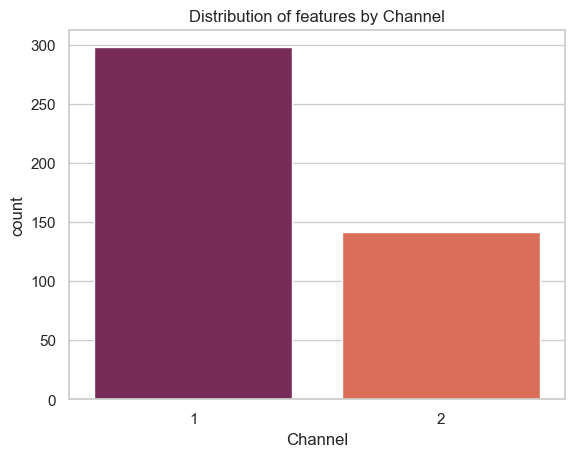

In [9]:
sb.countplot(x='Channel', data=wc_data, palette="rocket")
plt.title("Distribution of features by Channel")
plt.show()

#### The bar graph titled "Distribution of features by Channel"” shows the number of data across two different channels. Channel 1 has a higher count (around 300), while Channel 2 has fewer (just over 100).

In [10]:
describe = pd.DataFrame(wc_data.describe())
describe

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


1. Channel: This seems to be a categorical variable representing different channels of distribution or sales channels.
2. Region: Another categorical variable denoting different regions.
3. Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen: These are likely numerical variables representing the amount of spending or sales in each product category.

For each variable, the table provides the following summary statistics:

1. Count: The number of data points available for each variable.
2. Mean: The average value of the variable across all data points.
3. Std: The standard deviation, a measure of the dispersion of values around the mean.
4. Min: The minimum value observed in the dataset for that variable.
5. 25%, 50%, 75%: These values represent the quartiles of the data distribution, indicating the values below which a certain percentage of observations fall.
6. Max: The maximum value observed in the dataset for that variable.

"wc_data.describe()" is used to get the statistical info, such as : count, mean, std, min, 25%(Q1 quartile), 50%(median), 75%(Q3 quartile), and max.

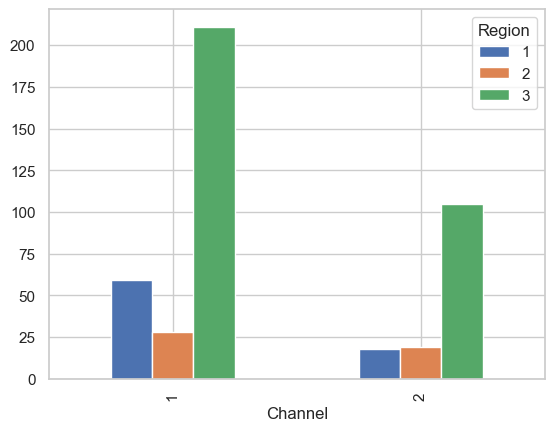

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [11]:
def categorical_multi(i,j):
    pd.crosstab(wc_data[i],wc_data[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(wc_data[i],wc_data[j]))

categorical_multi(i='Channel',j='Region')    

1. Channel 1:

Region 3 (green) has the highest count, reaching above 200.

Region 1 (blue) has a moderate count, just below 75.

Region 2 (orange) has the shortest count, approximately half that of Region 1.

2. Channel 2:

Again, Region 3 (green) has the highest count, but it is significantly shorter than in Channel 1, reaching just over half the height. Both Regions 1 and 2 have similar short bars, even shorter than their respective heights in Channel 1. In summary, Region 3 dominates in both channels, while Region 1 and Region 2 exhibit varying flower counts

In [12]:
features = ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
target = ['Channel']

## Overlayed histogram

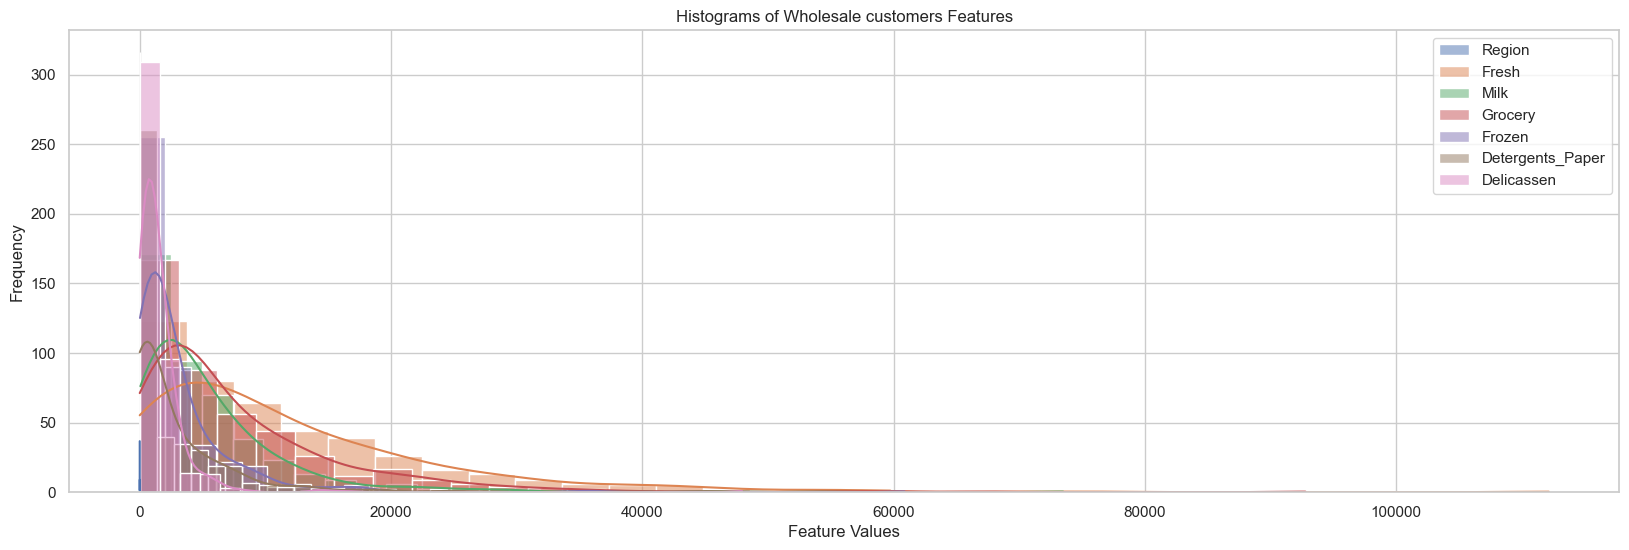

In [13]:
plt.figure(figsize=(20, 6))
for f in features:
    sb.histplot(wc_data[f], bins=30, label=f, kde=True)

plt.title('Histograms of Wholesale customers Features')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The graph is a histogram representing the distribution of various product categories for wholesale customers. The categories include Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen. Most of the feature values are concentrated towards the left side of the graph, indicating that most customers purchase these products in lower quantities. This type of visualization is useful for understanding the purchasing behavior of customers. 

## Histogram and Boxplot with respect to target variable : "Channel"

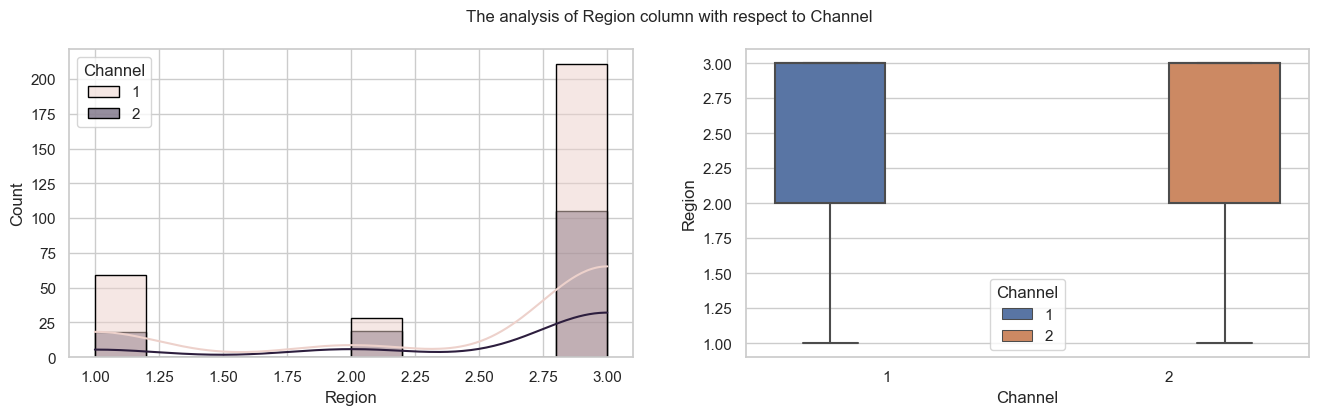

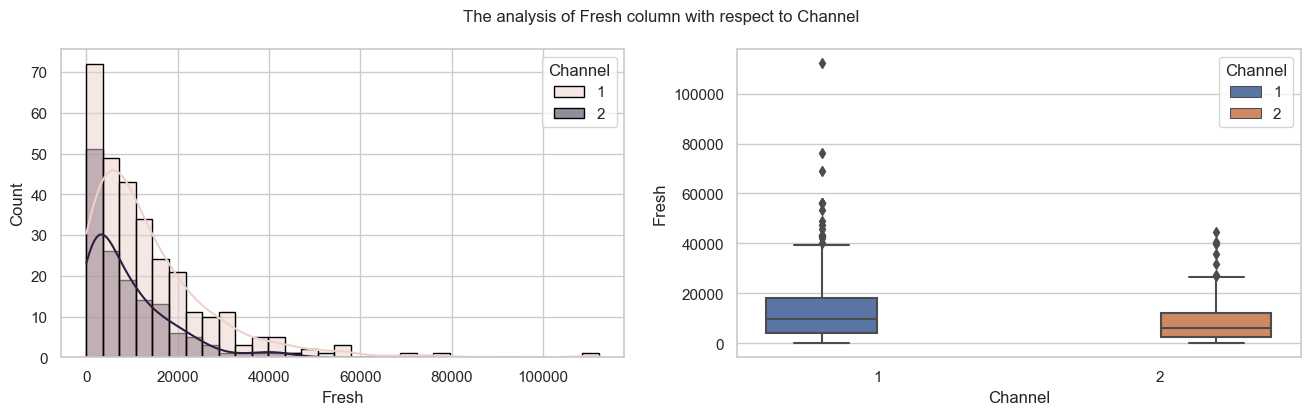

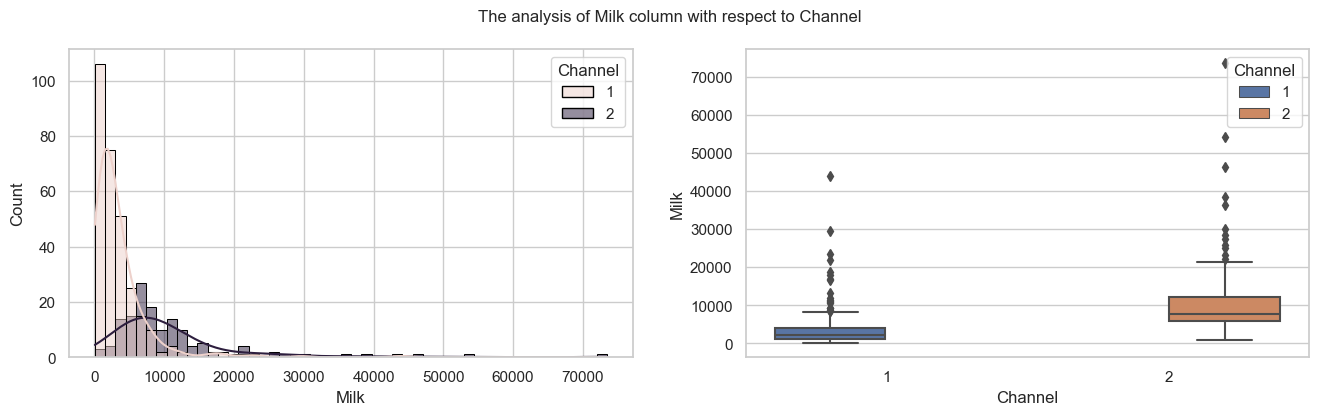

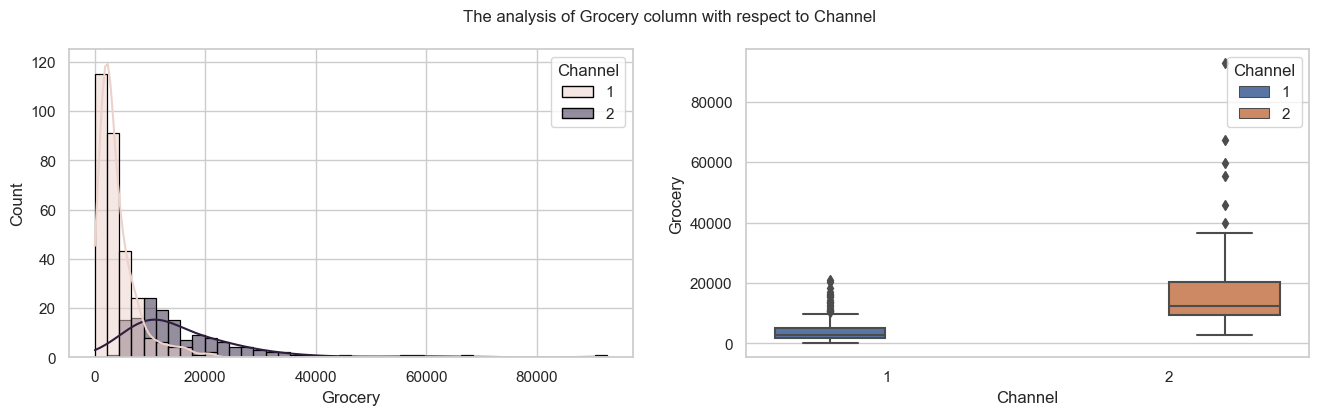

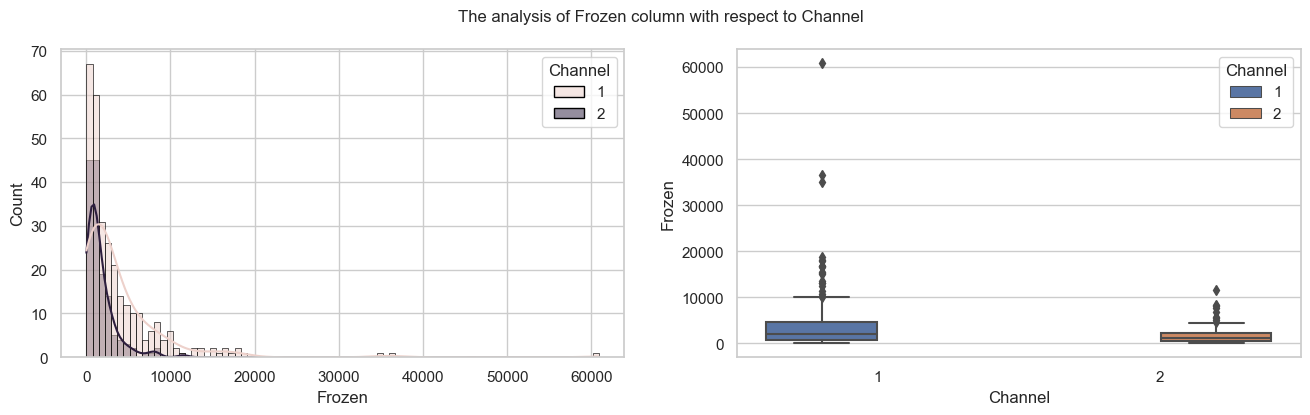

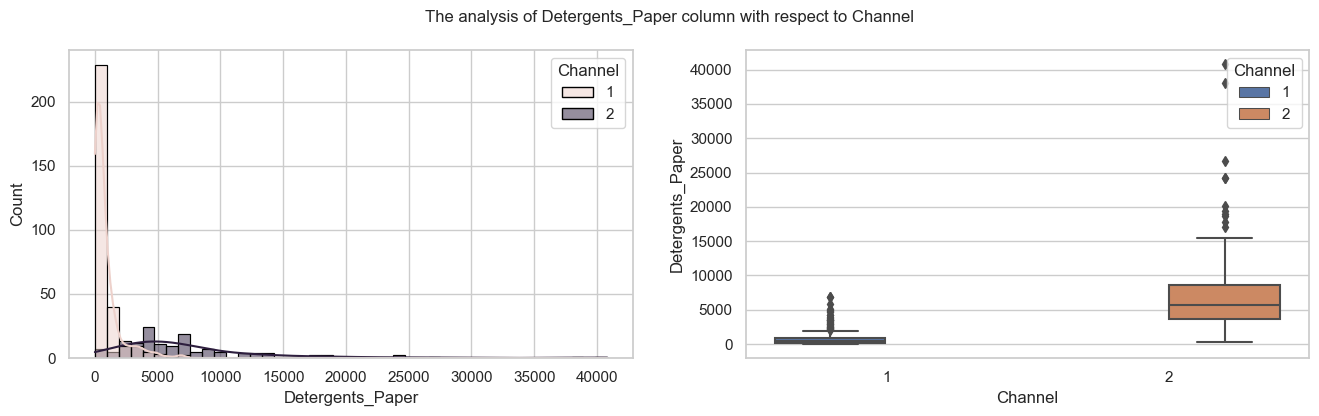

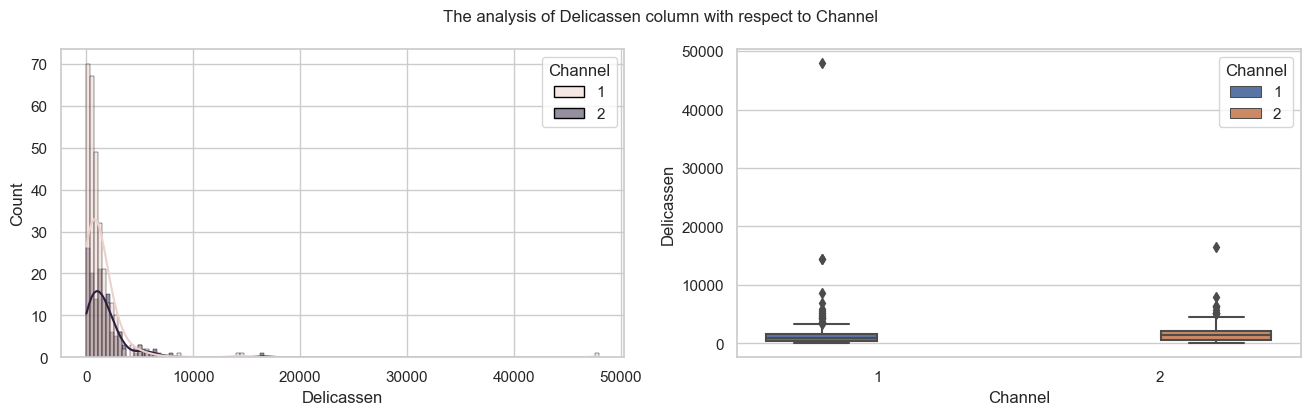

In [14]:
for f in features:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {f} column with respect to Channel", fontsize=12)
    plt.subplot(1, 2, 1)
    sb.histplot(data=wc_data, x=f, hue="Channel", kde=True, edgecolor = 'black') 
    plt.subplot(1, 2, 2)
    sb.boxplot(data=wc_data, x='Channel', y=f, hue = 'Channel')

plt.show() 

Above the multiple sets of graphs and charts, each set includes a histogram, a box plot, and a bar chart. 

The histograms display frequency distributions with various ranges and patterns. The box plots show the distribution and spread of the data with median values indicated. Bar charts compare two categories labeled as “Channel 1” and “Channel 2”, displaying different heights representing varying quantities or values. Each graph has labeled axes indicating the variables being measured or compared.

### Visualize the distribution of each feature using histograms, KDE and boxplot.

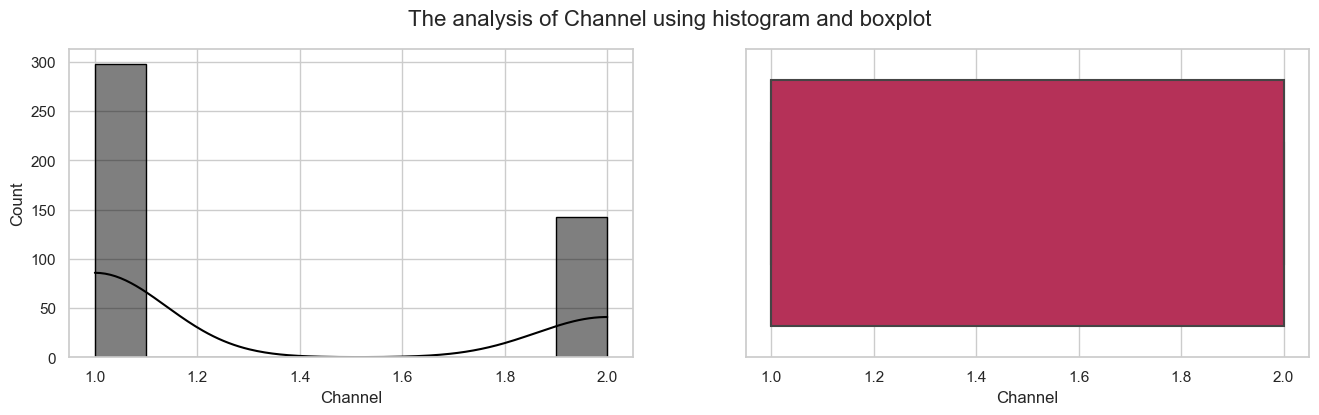

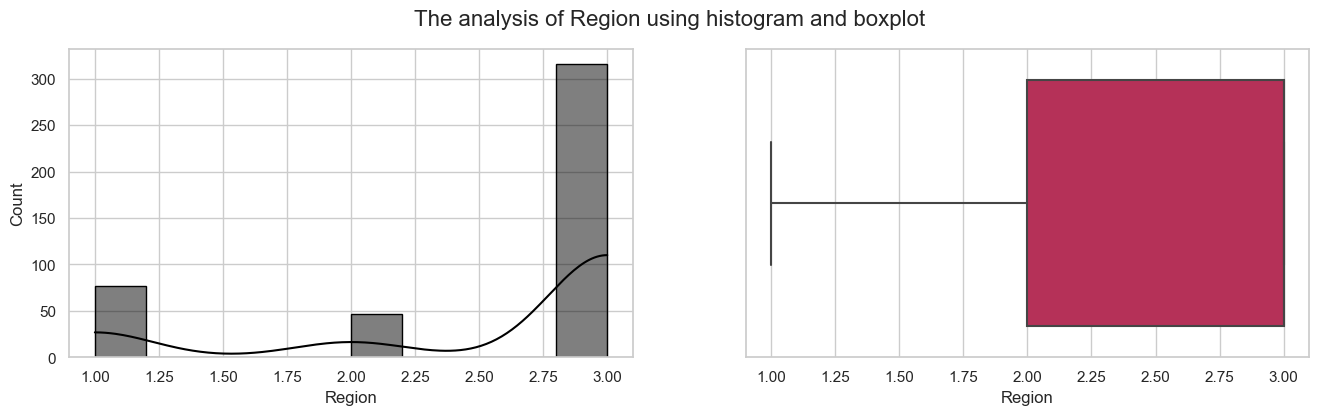

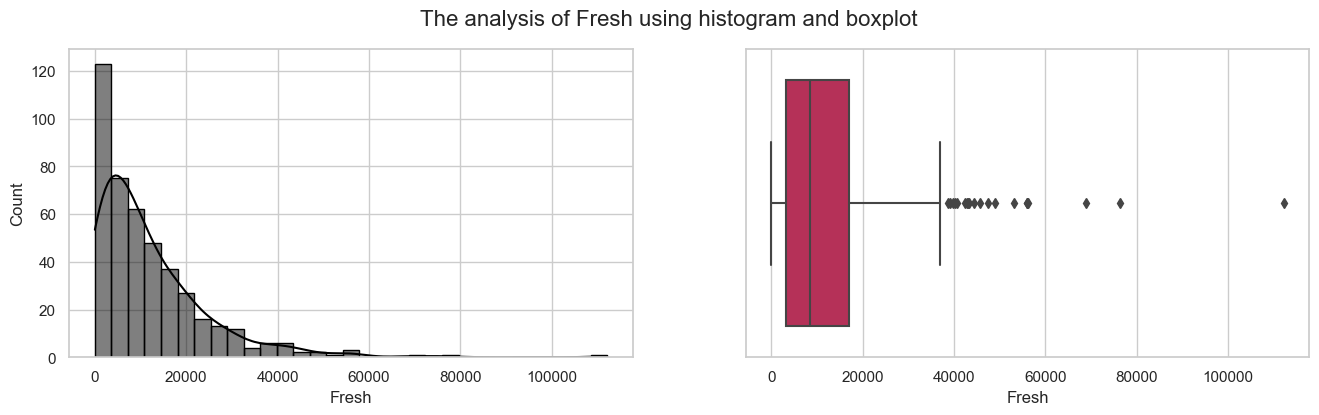

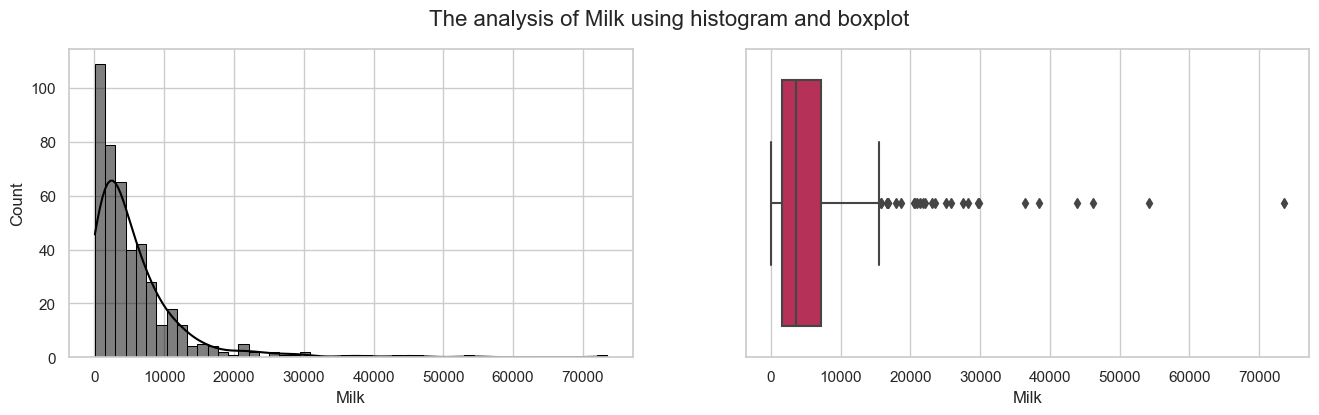

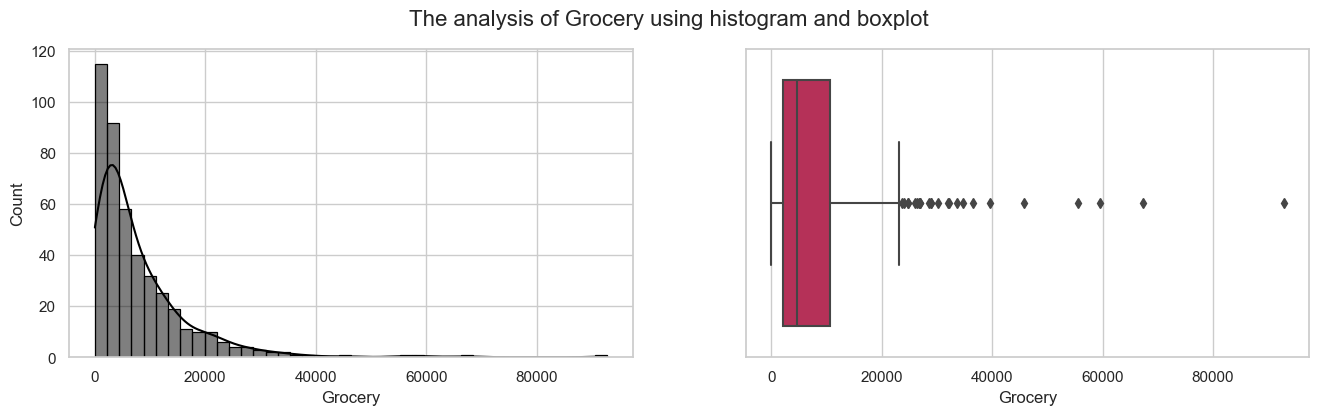

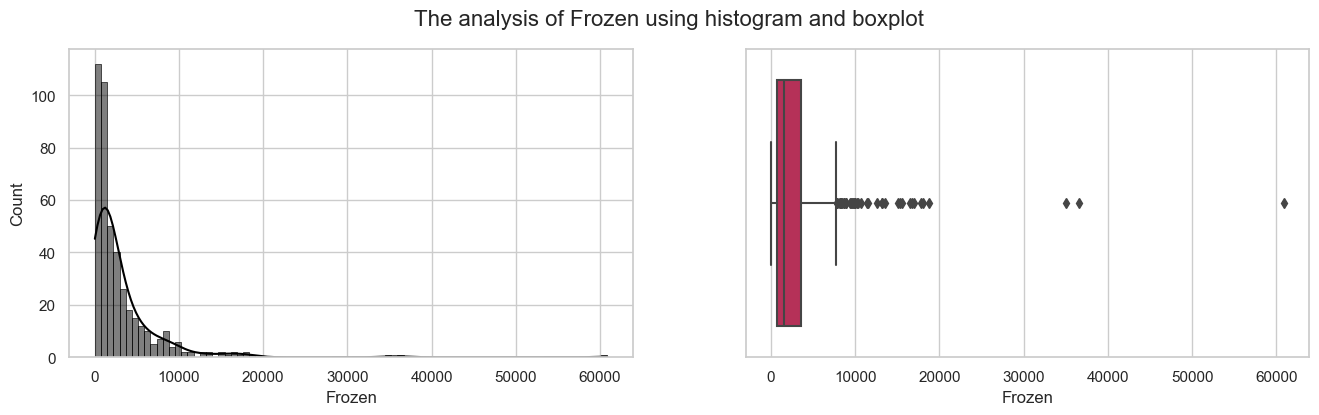

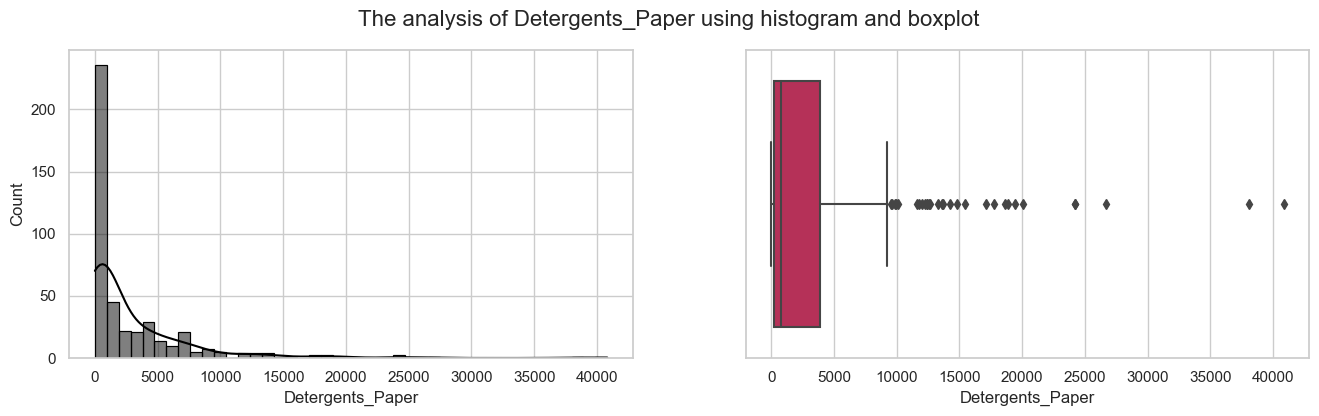

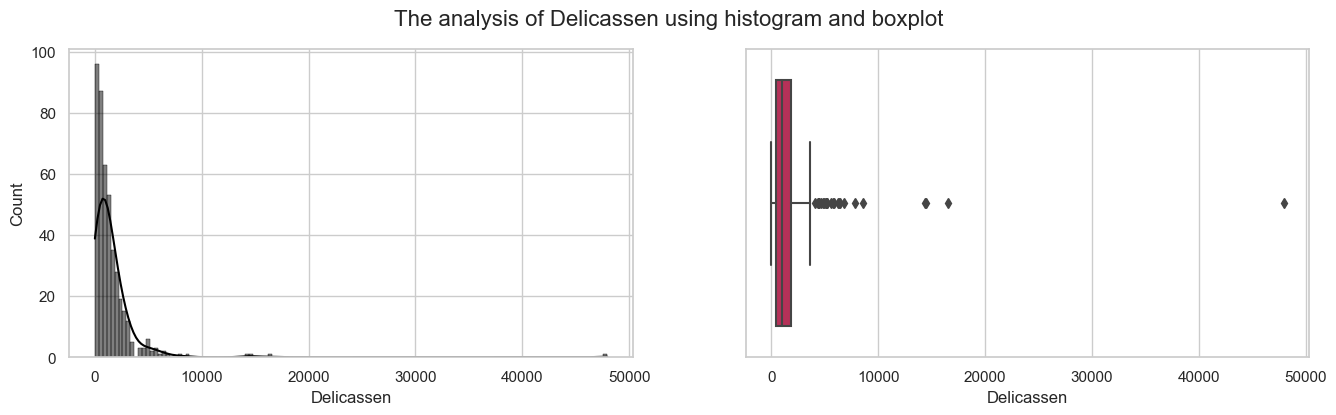

In [15]:
for f in wc_data.columns:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {f} using histogram and boxplot", fontsize=16)
    plt.subplot(1, 2, 1)
    sb.histplot(data=wc_data, x=f, edgecolor = 'black' ,kde=True, color='Black') 
    plt.subplot(1, 2, 2)
    sb.boxplot(data=wc_data, x=f, palette="rocket")

plt.show() 

The above output has eight pairs of graphs, each pair consisting of a histogram on the left and a boxplot on the right. These pairs are labeled as follows:

1. The analysis of Channel
2. The analysis of RegionR
3. The analysis of Fresh
4. The analysis of Milk
5. The analysis of Grocery
6. The analysis of Frozen
7. The analysis of Detergents_Paper
8. The analysis of Delicassen

Each histogram displays the frequency distribution of a specific variable, with varying shapes, including some of these are skewed to the right. The boxplots provide additional information about the distribution’s central tendency, variability, and outliers. 

By Boxplot we get to know that there are severals outliers in most of the columns.

## Skewness

In [16]:
numeric_skewness = wc_data.select_dtypes(include=[np.number]).skew()
print("Skewness:")
print(numeric_skewness)

Skewness:
Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


# Handelling the Skewness and removing the outliers.

### Moving forward without handling the outliers and skewness because we don't have enough data to deal with.

### Tried the Box-Cox and quantile methods but did not get better accuracy, so removing the steps. Please refer to the raw code blocks below for reference.

# 

## Correlation matrices.

In [17]:
wc_data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

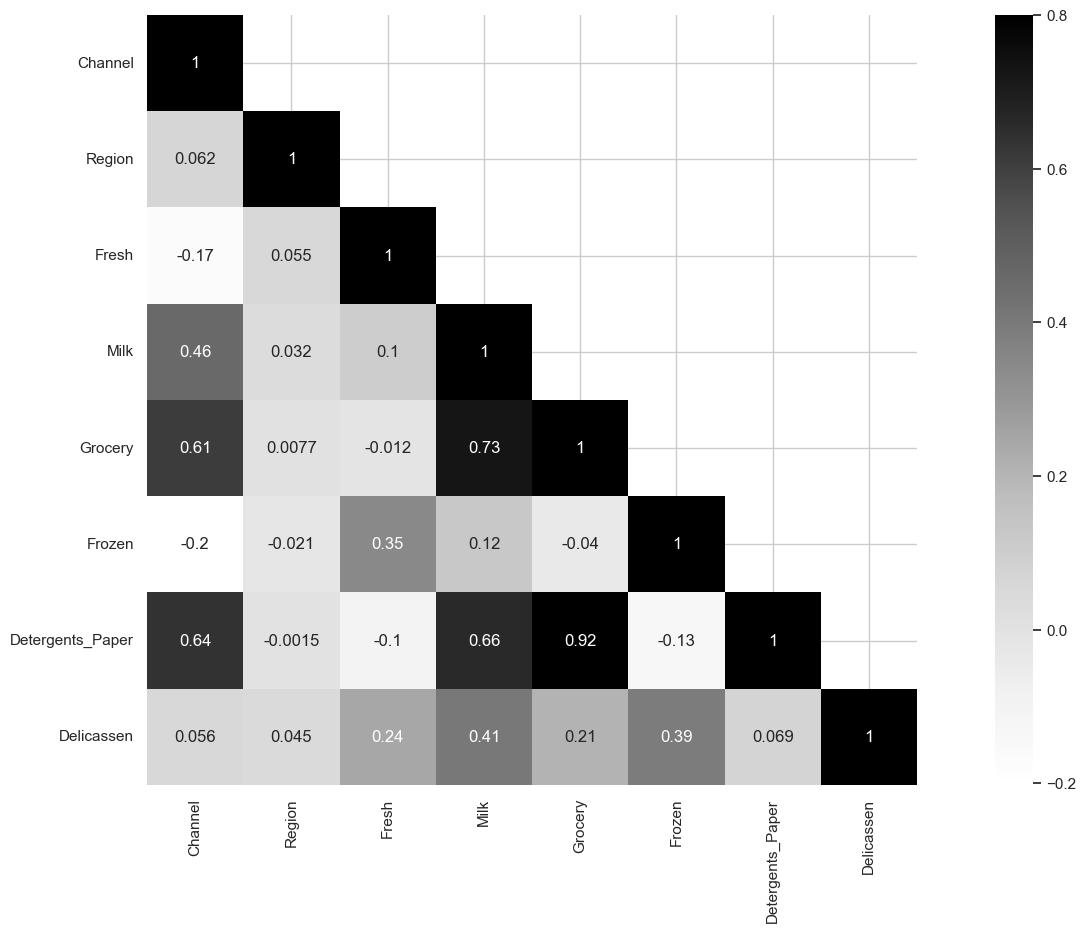

In [18]:
corrMatt = wc_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cmap="Greys")

1. Variables:

#The heatmap includes the following variables:

*Channel
*Region
*Fresh
*Milk
*Grocery
*Frozen
*Detergents_Paper
*Delicatessen

2. Correlation Strength:

Darker squares indicate strong positive correlations between variables.

Lighter squares represent negative correlations.

The diagonal line (from top left to bottom right) shows perfect correlation (coefficient = 1) for each variable with itself.

3. Specific Correlations:
    Some notable correlations:
Positive: Between “Grocery” and “Detergents_Paper.”

Negative: Between “Fresh” and “Grocery.”; Between “Frozen” and “Detergents_Paper.”

4. Scale:

The scale on the right side indicates the correlation coefficient values associated with each shade of gray.

Remember that correlation does not imply causation, but understanding these relationships can guide further analysis or modeling.


# 

# Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?

In [19]:
# Assuming 'Channel' is the target and the rest are features
X = wc_data.drop('Channel', axis=1)
Y = wc_data['Channel']


## MinMax Scaling.

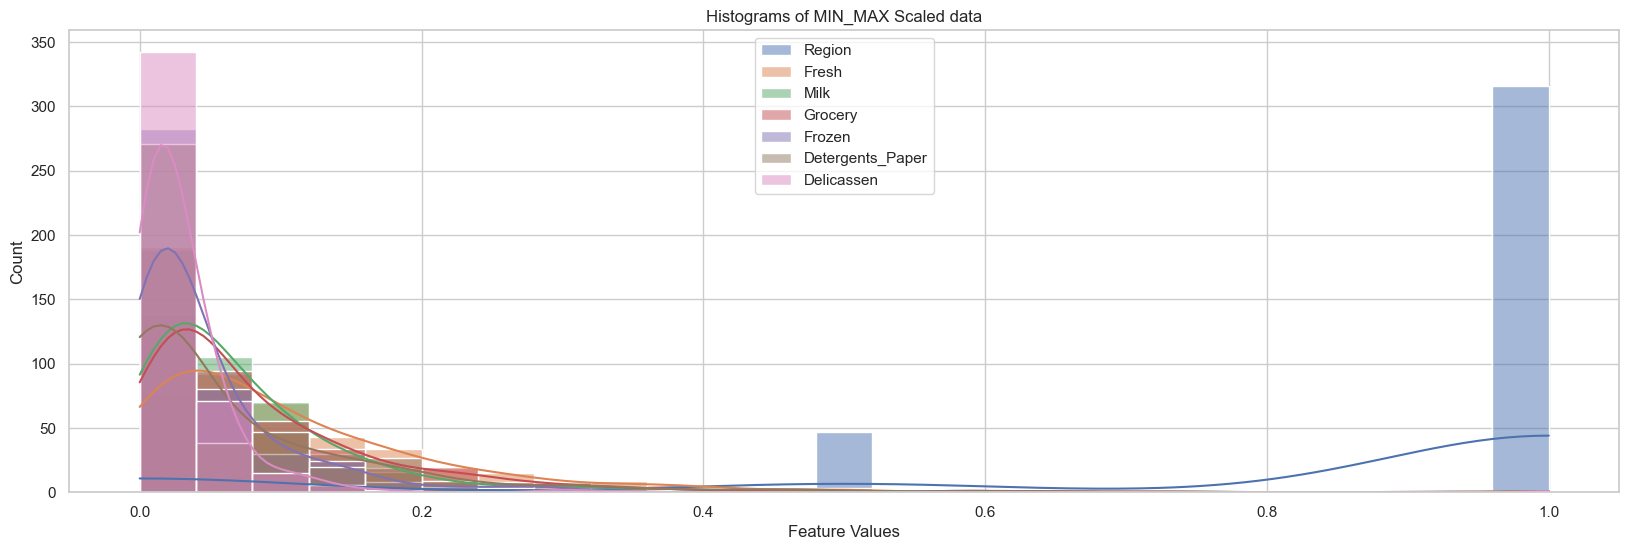

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...
435,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [20]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

minmax_scaled_df = pd.DataFrame(X_min_max_scaled, columns=X.columns)

plt.figure(figsize=(20, 6))
for f1 in features:
    sb.histplot(minmax_scaled_df[f1], bins=25, label=f1, kde=True, palette="paired")

plt.title('Histograms of MIN_MAX Scaled data')
plt.xlabel('Feature Values')
plt.ylabel('Count')
plt.legend()
plt.show()

minmax_scaled_df

## MinMax Scaling Analysis

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


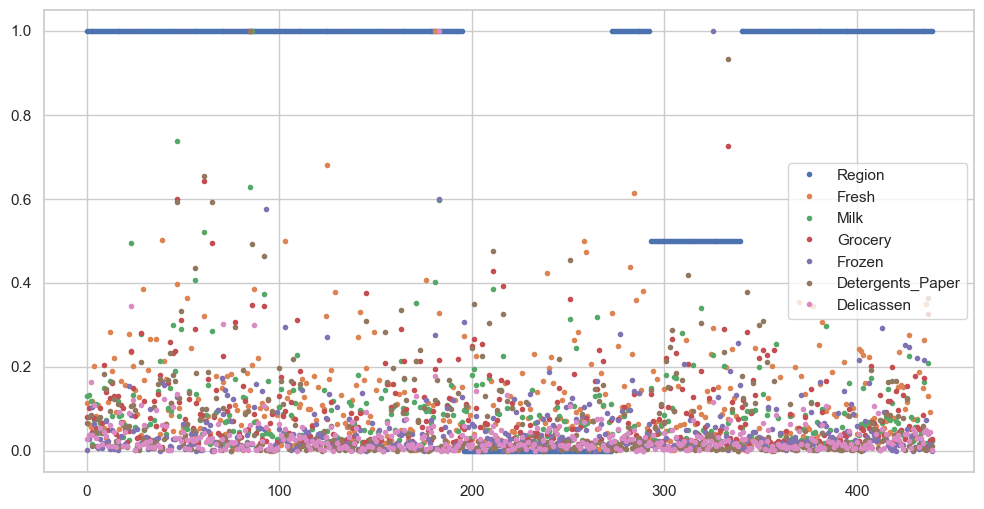

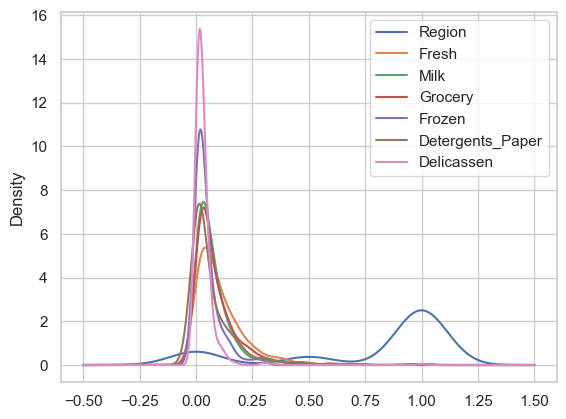

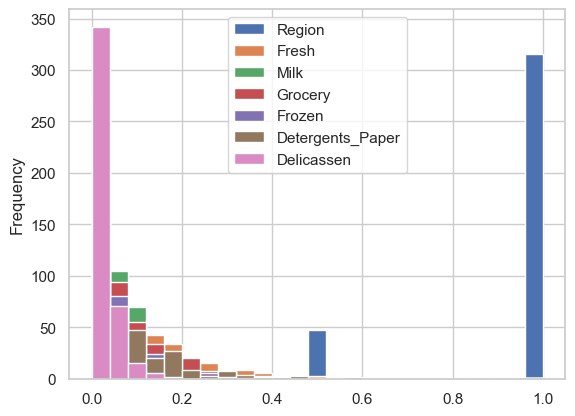

In [21]:
minmax_scaled_df.plot(figsize=(12,6), style='.');
minmax_scaled_df.plot(kind='kde');
minmax_scaled_df.plot(kind='hist', bins=25)
minmax_scaled_df.describe()

#### Using the MinMaxScaler technique, we scaled the data into a uniform value across all columns. The values of all features have been translated into a uniform range on the same scale [0,1].

# 

## Standard Scaling

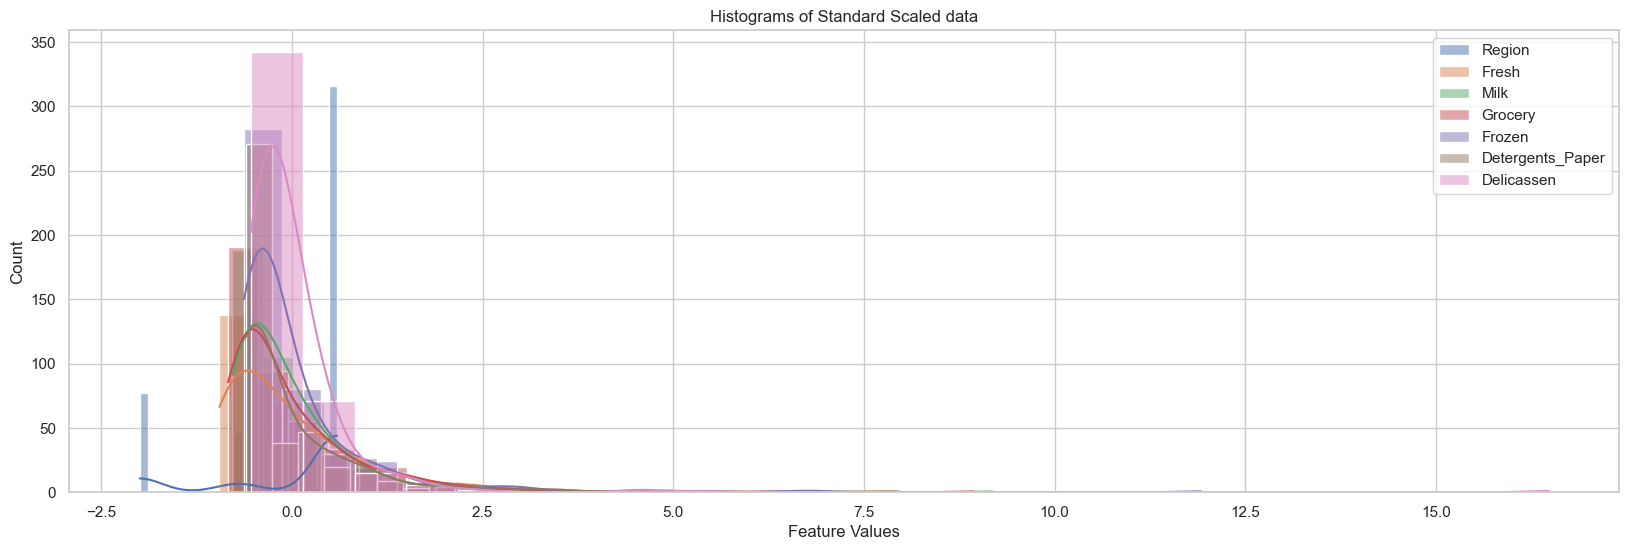

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...
435,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [22]:
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=X.columns)

plt.figure(figsize=(20, 6))
for f1 in features:
    sb.histplot(standard_scaled_df[f1], bins=25, label=f1, kde=True)

plt.title('Histograms of Standard Scaled data')
plt.xlabel('Feature Values')
plt.ylabel('Count')
plt.legend()
plt.show()
standard_scaled_df

## Standard Scaling Analysis

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


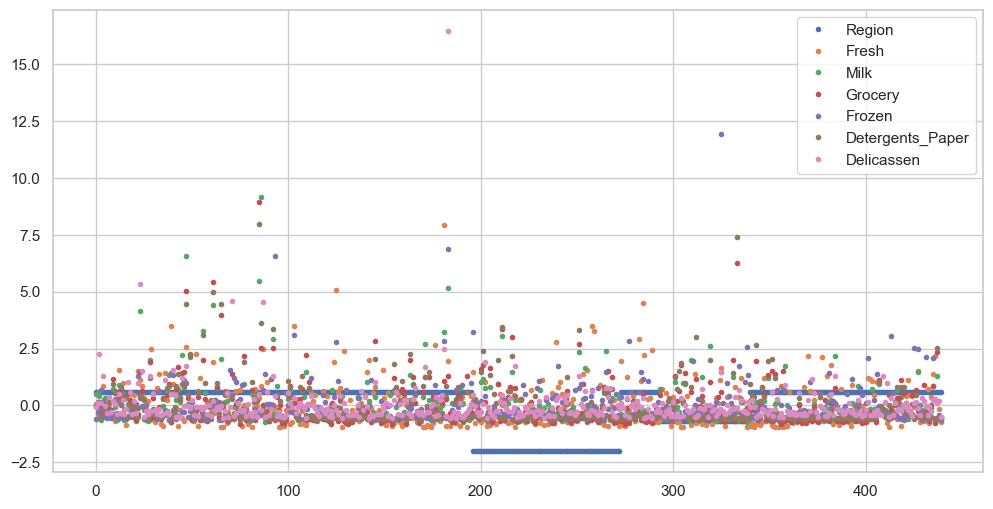

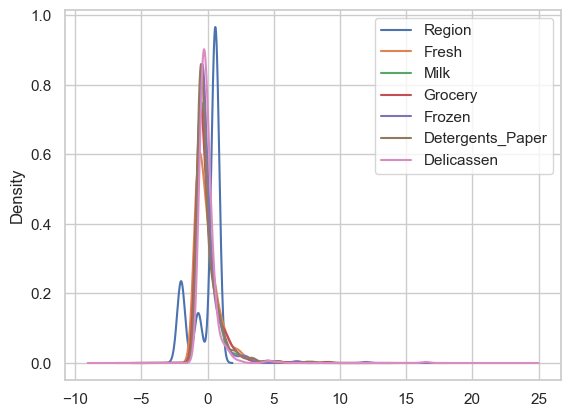

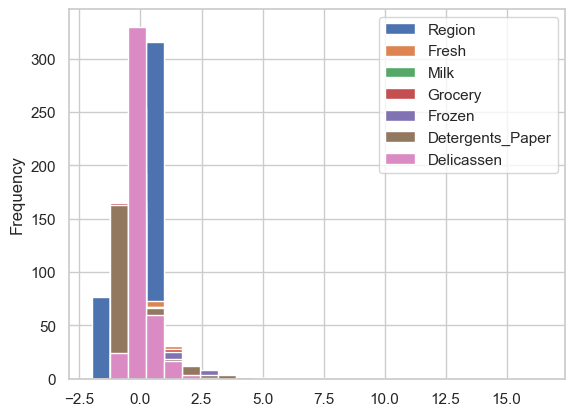

In [23]:
standard_scaled_df.plot(figsize=(12,6), style='.');
standard_scaled_df.plot(kind='kde');
standard_scaled_df.plot(kind='hist', bins=25)
standard_scaled_df.describe()

#### The StandardScaler method is used to scale the data uniformly across all columns. As seen in the accompanying table, the values of all features have been translated into a uniform range with the same scale. As a result, the model can generate predictions with greater ease. Kind kde appears to be superior to hist because data in hist appears to be overlapped, making it difficult to see the value for each field, but data visualization in kde is more refined.

# 

### Histogram comparision of original data, MinMax Scaled data and Standard Scaled data.

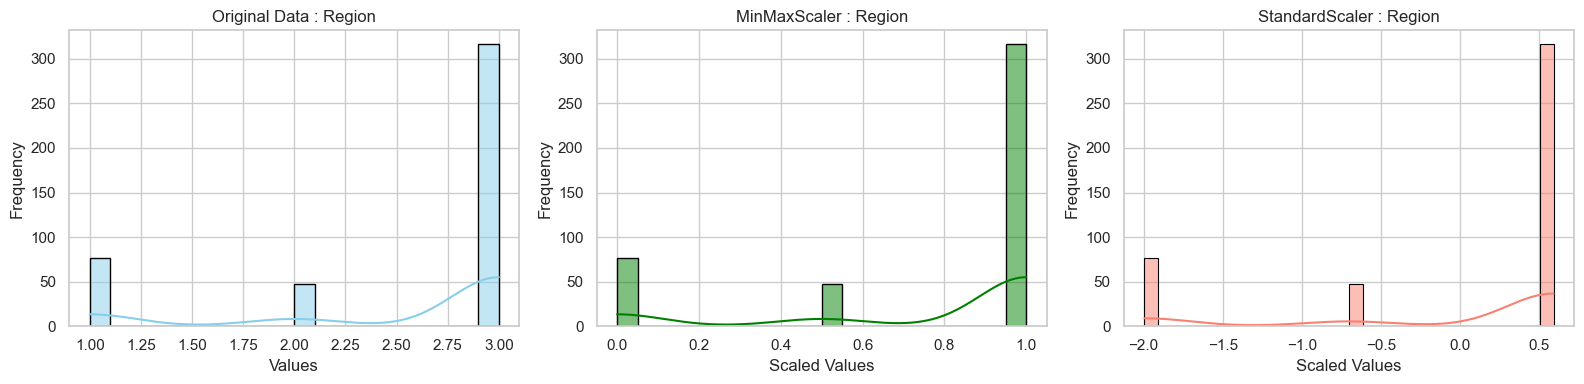

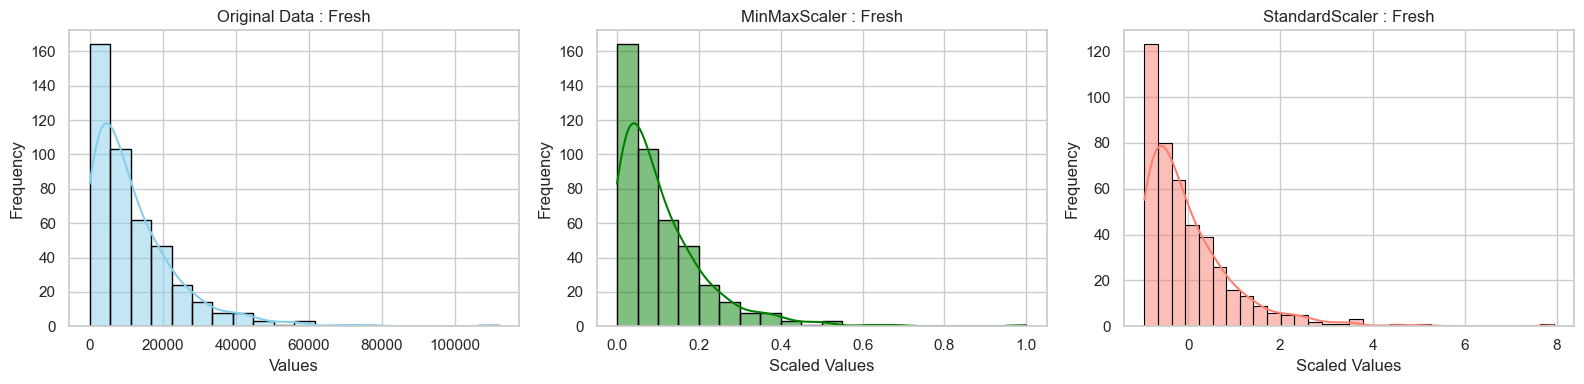

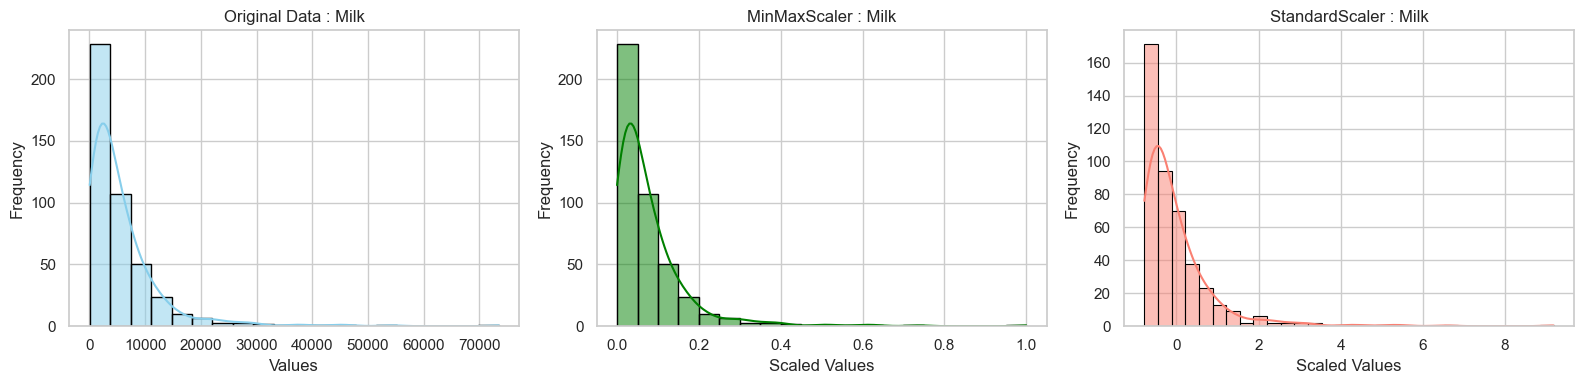

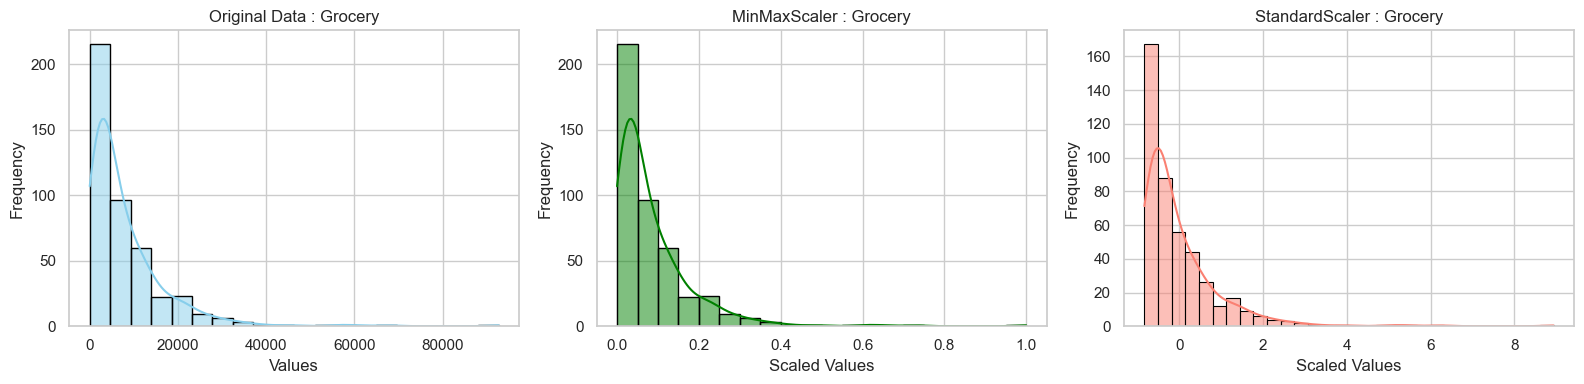

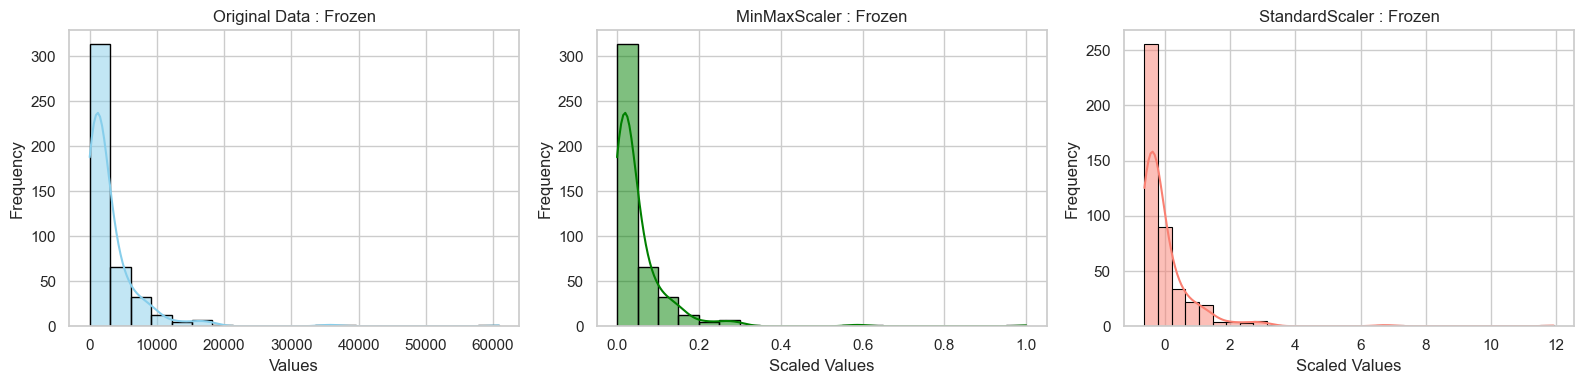

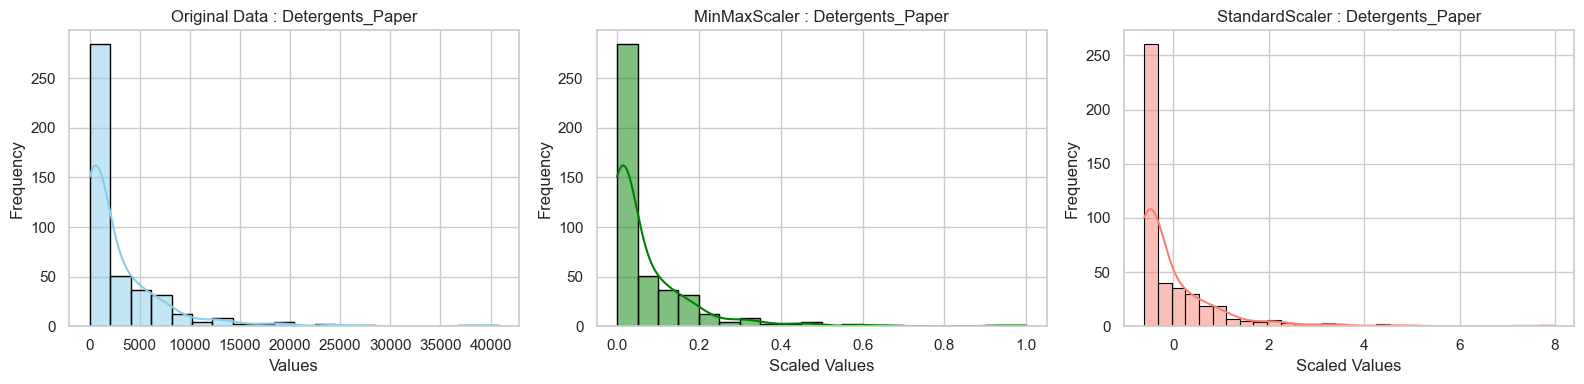

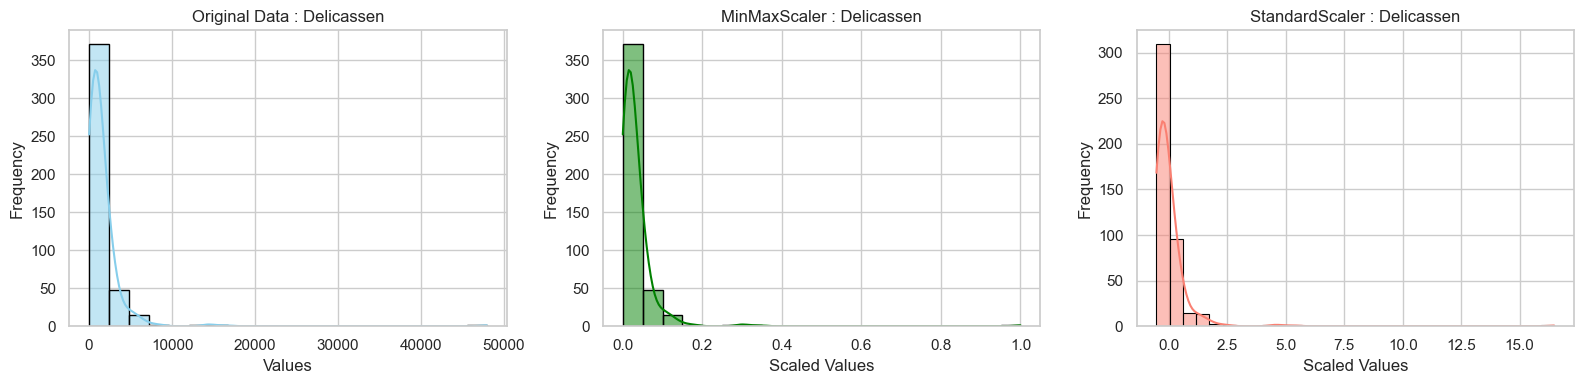

In [24]:
for f2 in features:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sb.histplot(data = wc_data, x = f2,  bins=20, color='skyblue', edgecolor='black', kde=True) 

    plt.title(f'Original Data : {f2}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# MinMaxScaler
    plt.subplot(1, 3, 2)
    sb.histplot(minmax_scaled_df[f2], bins=20, color='green', edgecolor='black', kde=True) 
    plt.title(f'MinMaxScaler : {f2}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')

# StandardScaler
    plt.subplot(1, 3, 3)
    sb.histplot(standard_scaled_df[f2], bins=30, color='salmon', edgecolor='black', kde=True) 

    plt.title(f'StandardScaler : {f2}')
    plt.xlabel('Scaled Values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


Standardscaler assumes that the data contains normally distributed features and scales them to zero mean and one standard deviation.

After applying the scaler, all of the features have the same scale.

Minmaxscaler reduces the data within the range of -1 to 1 (if there are negative values), responds well when the standard deviation is low, and is utilized when the distribution is not Gaussian.This scaler is sensitive to outliers.

The Standard scaler has centered curves with no outliers, whereas the Minmax has outliers.

So we'll stick with the usual scaler, for further analysis consider the below and above histograms.

## Overlayed Histogram for the Standard and MinMax scaled data.

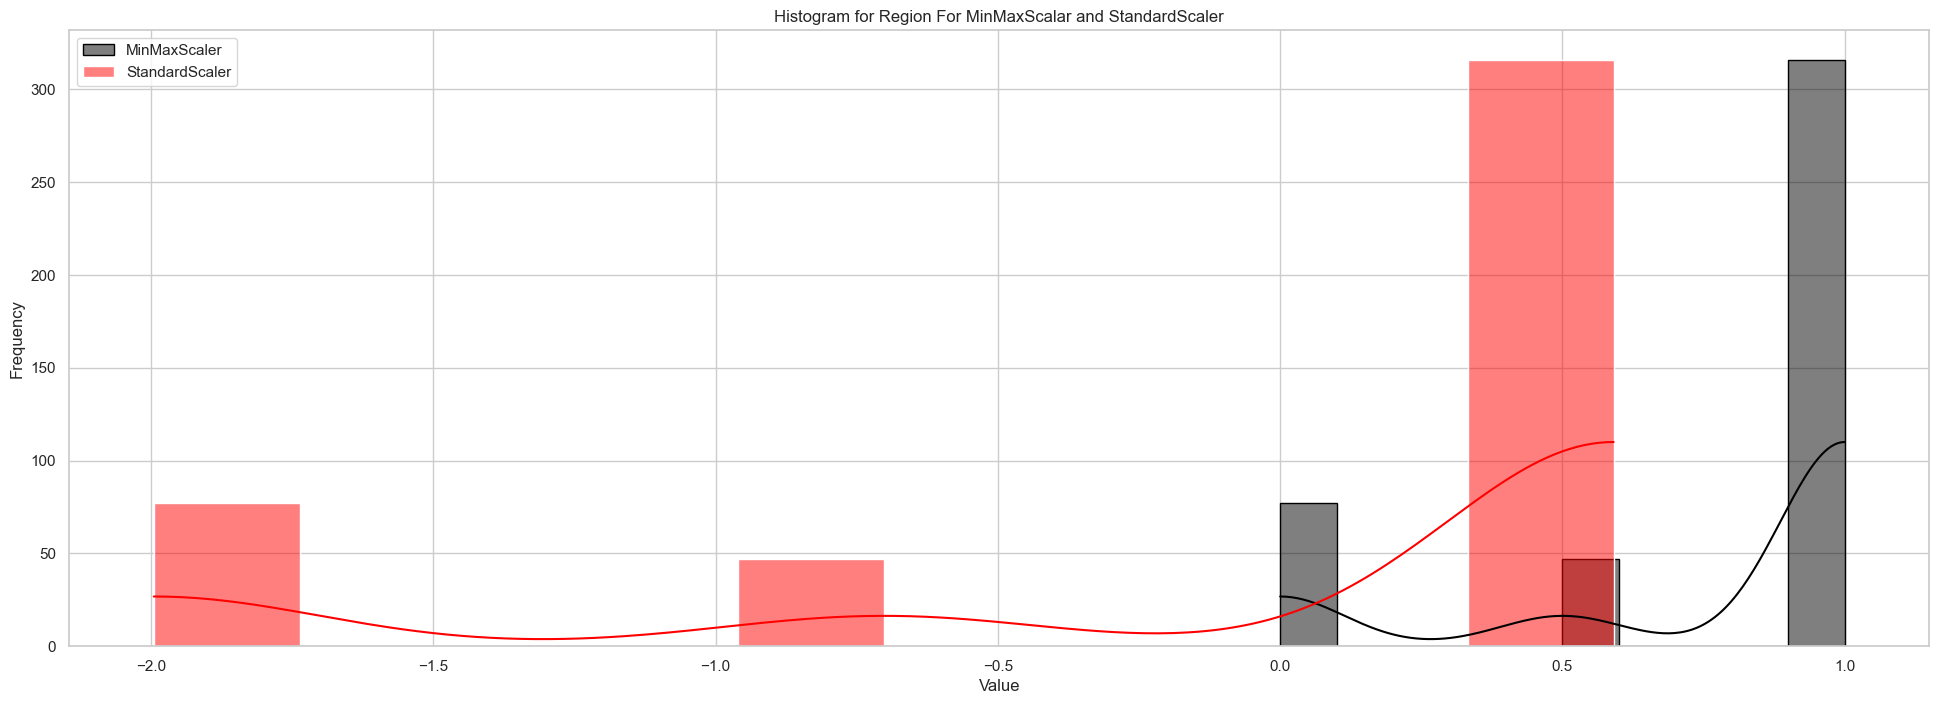

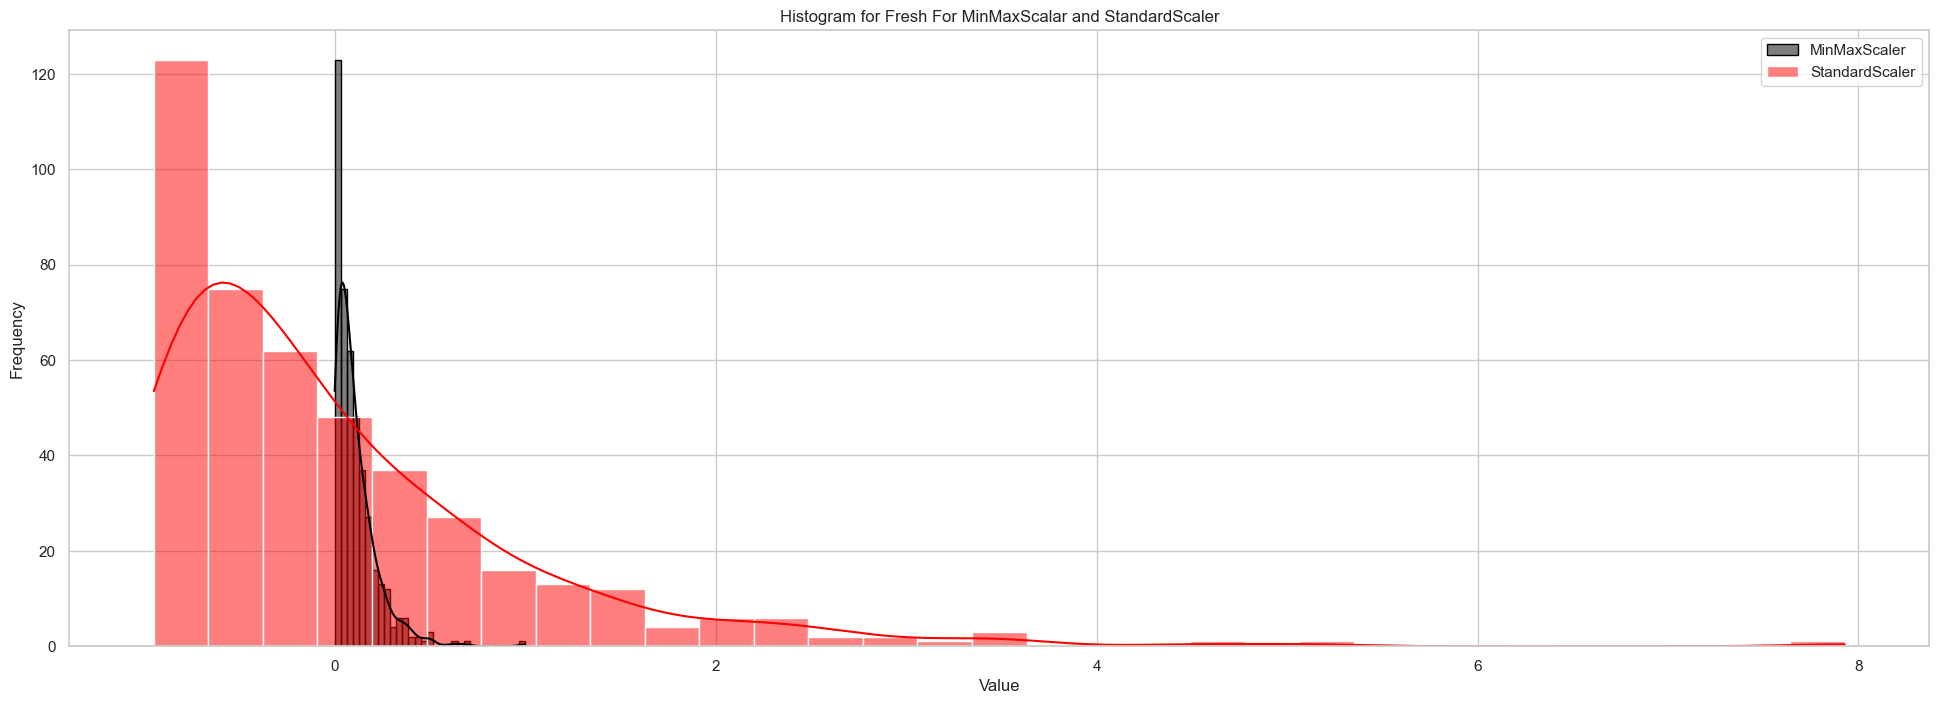

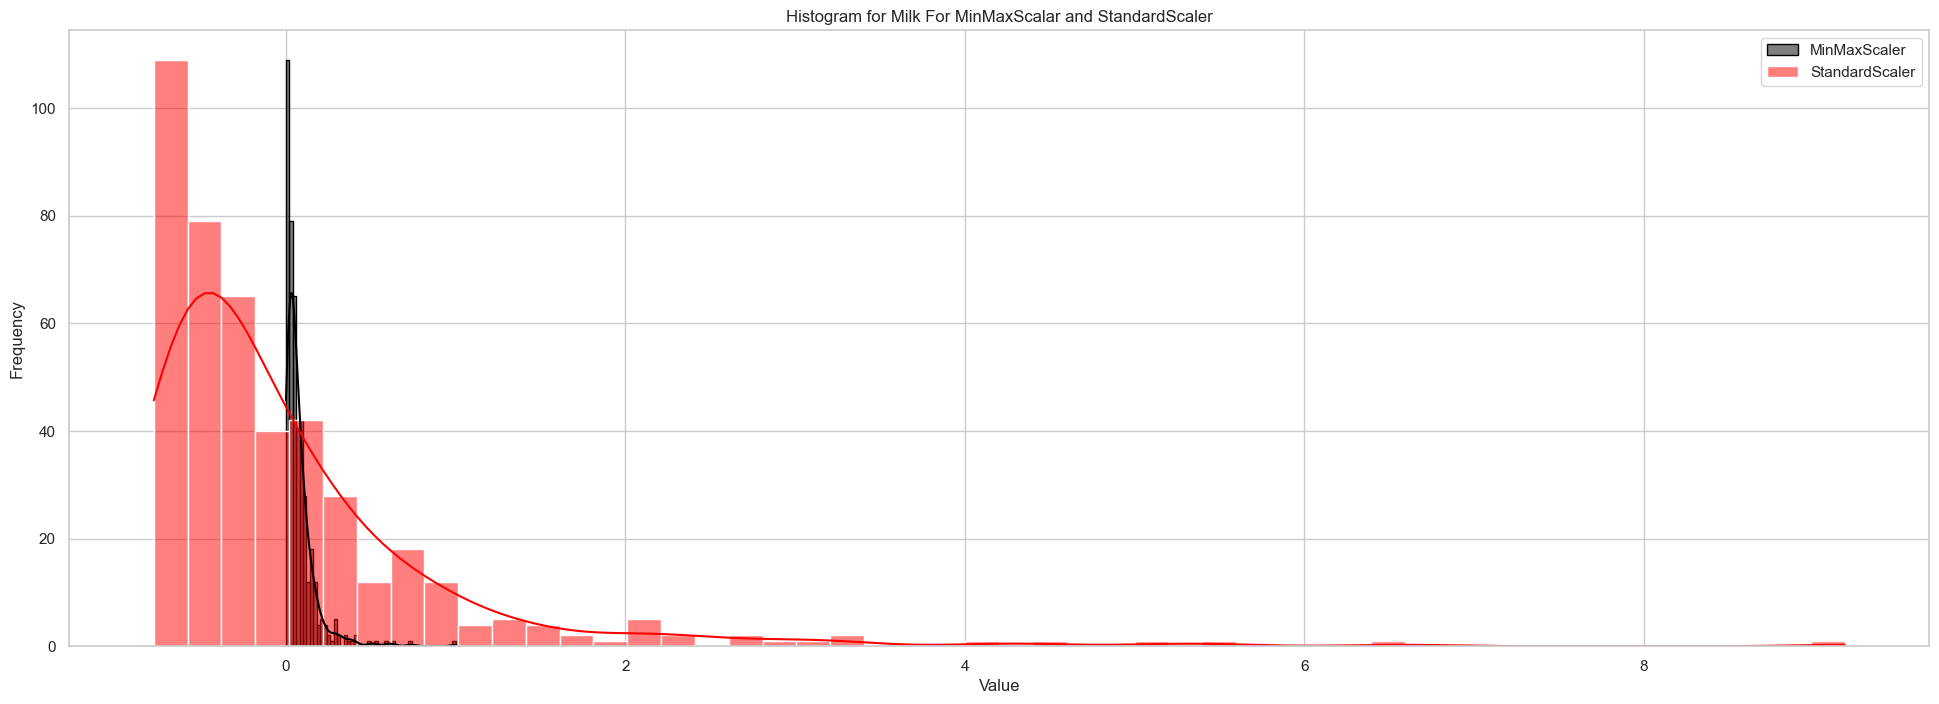

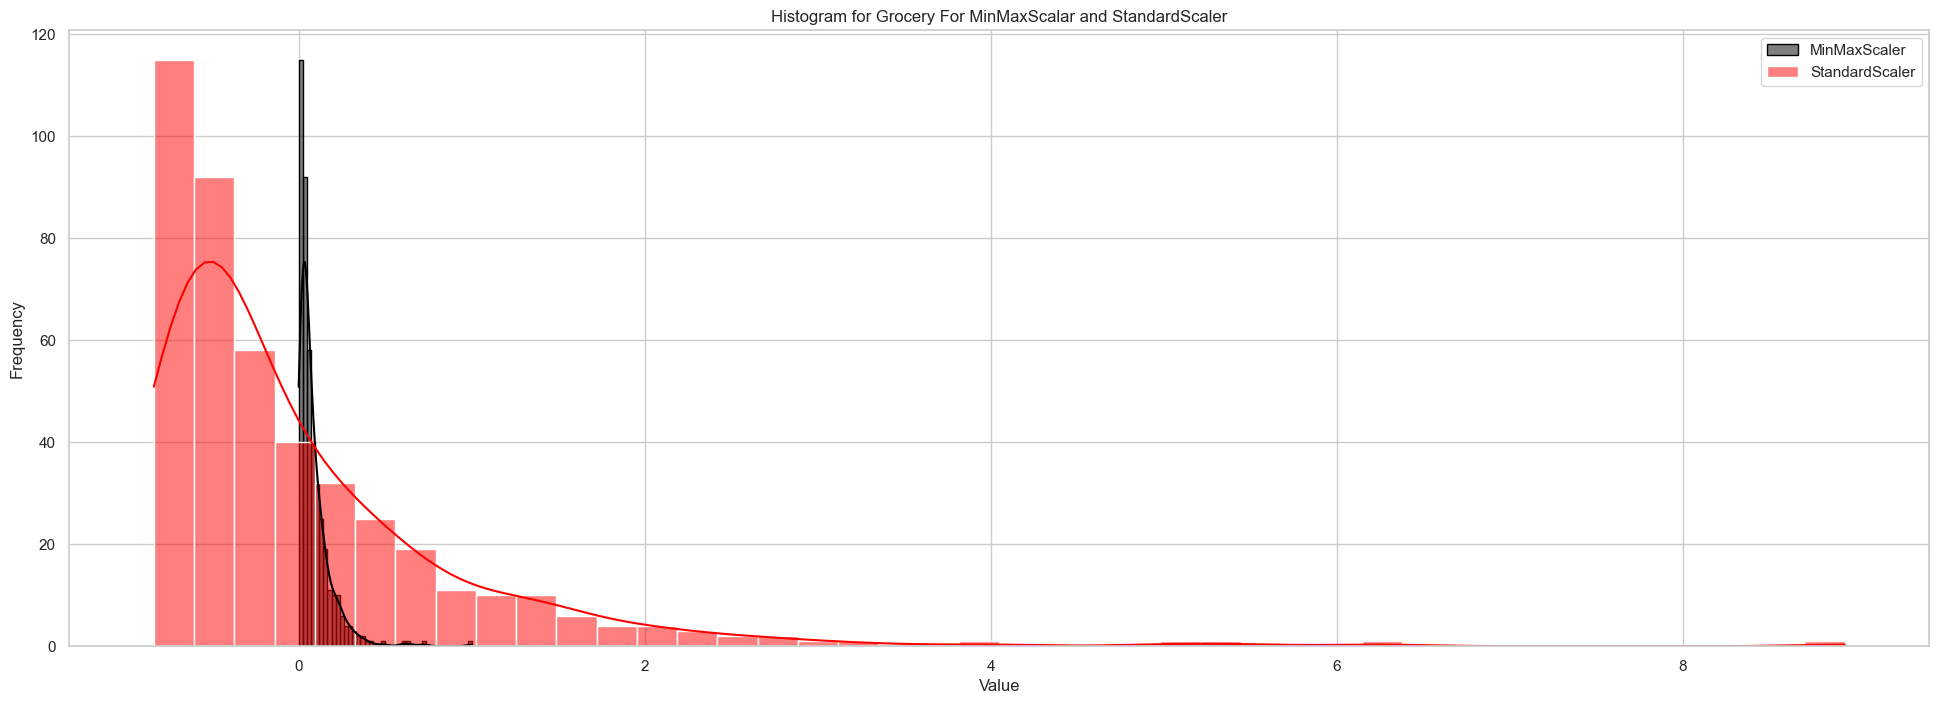

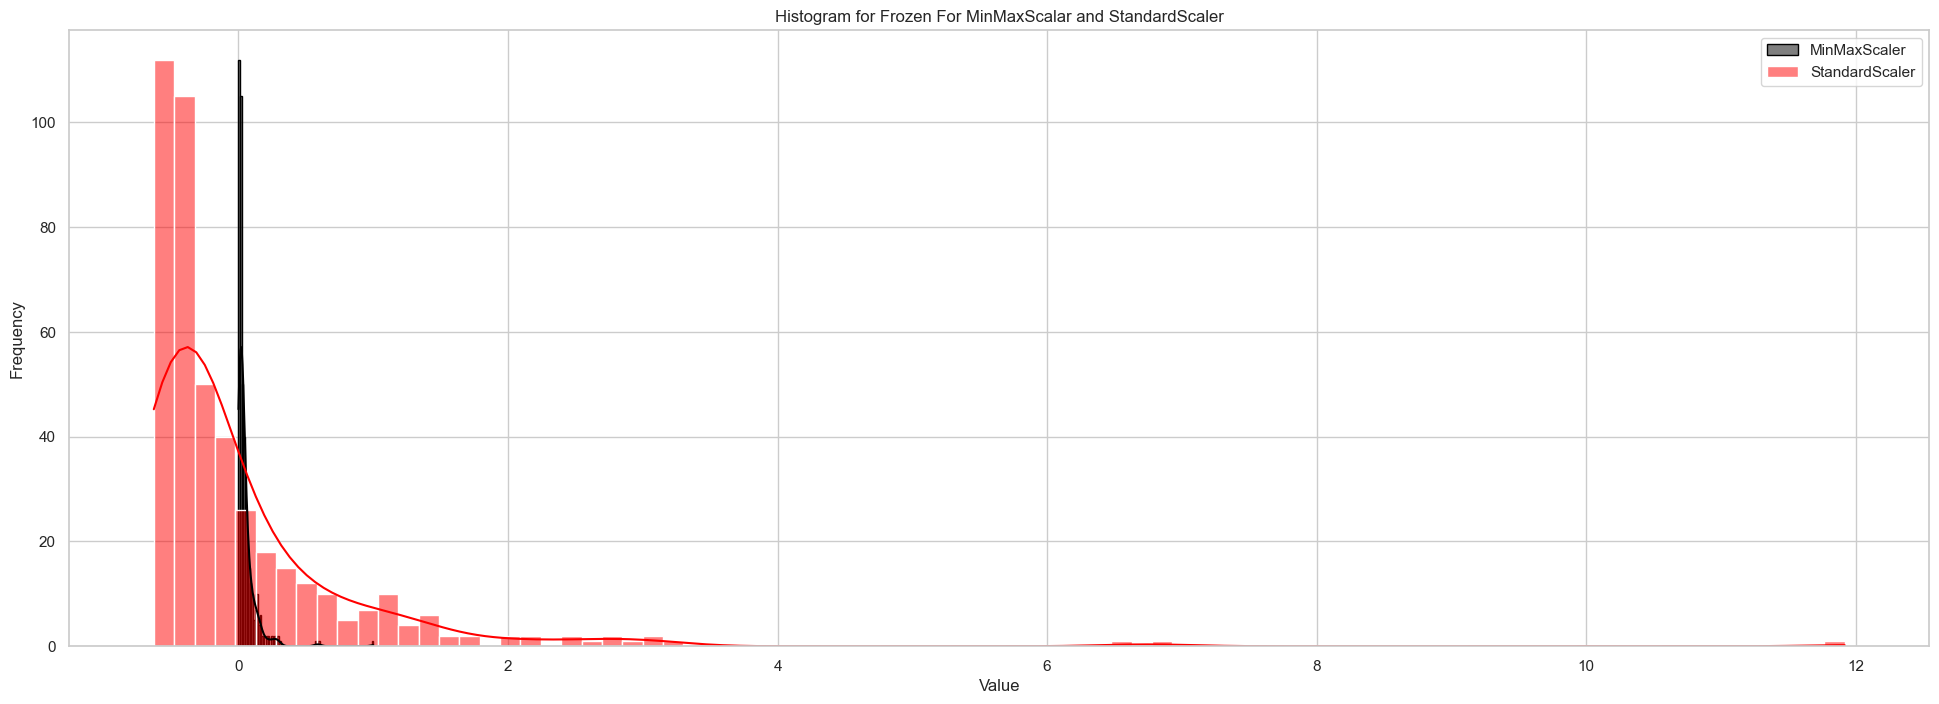

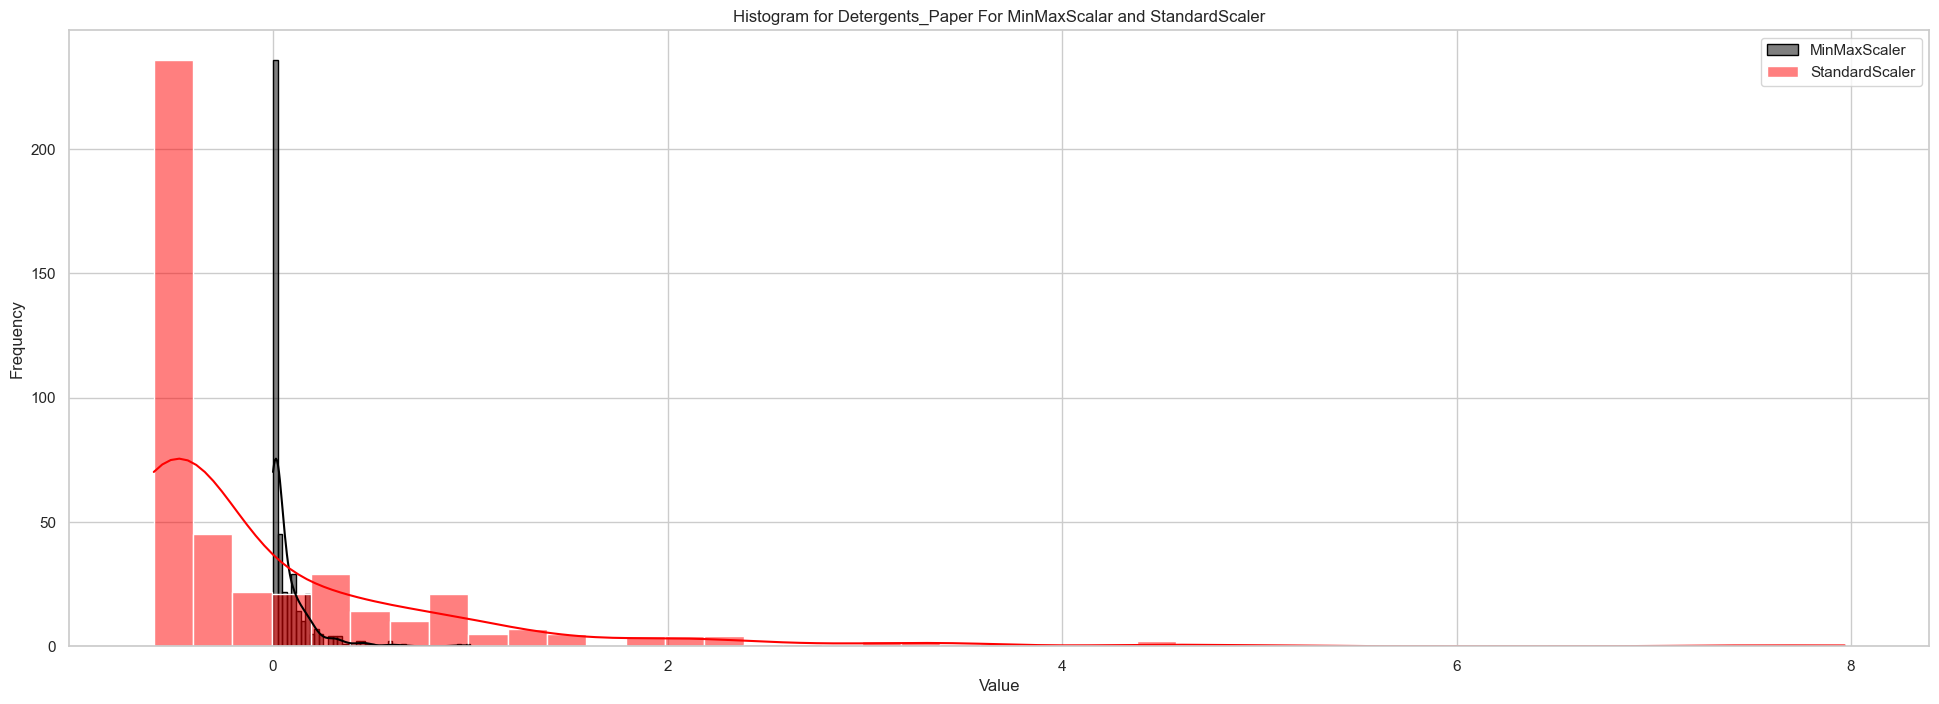

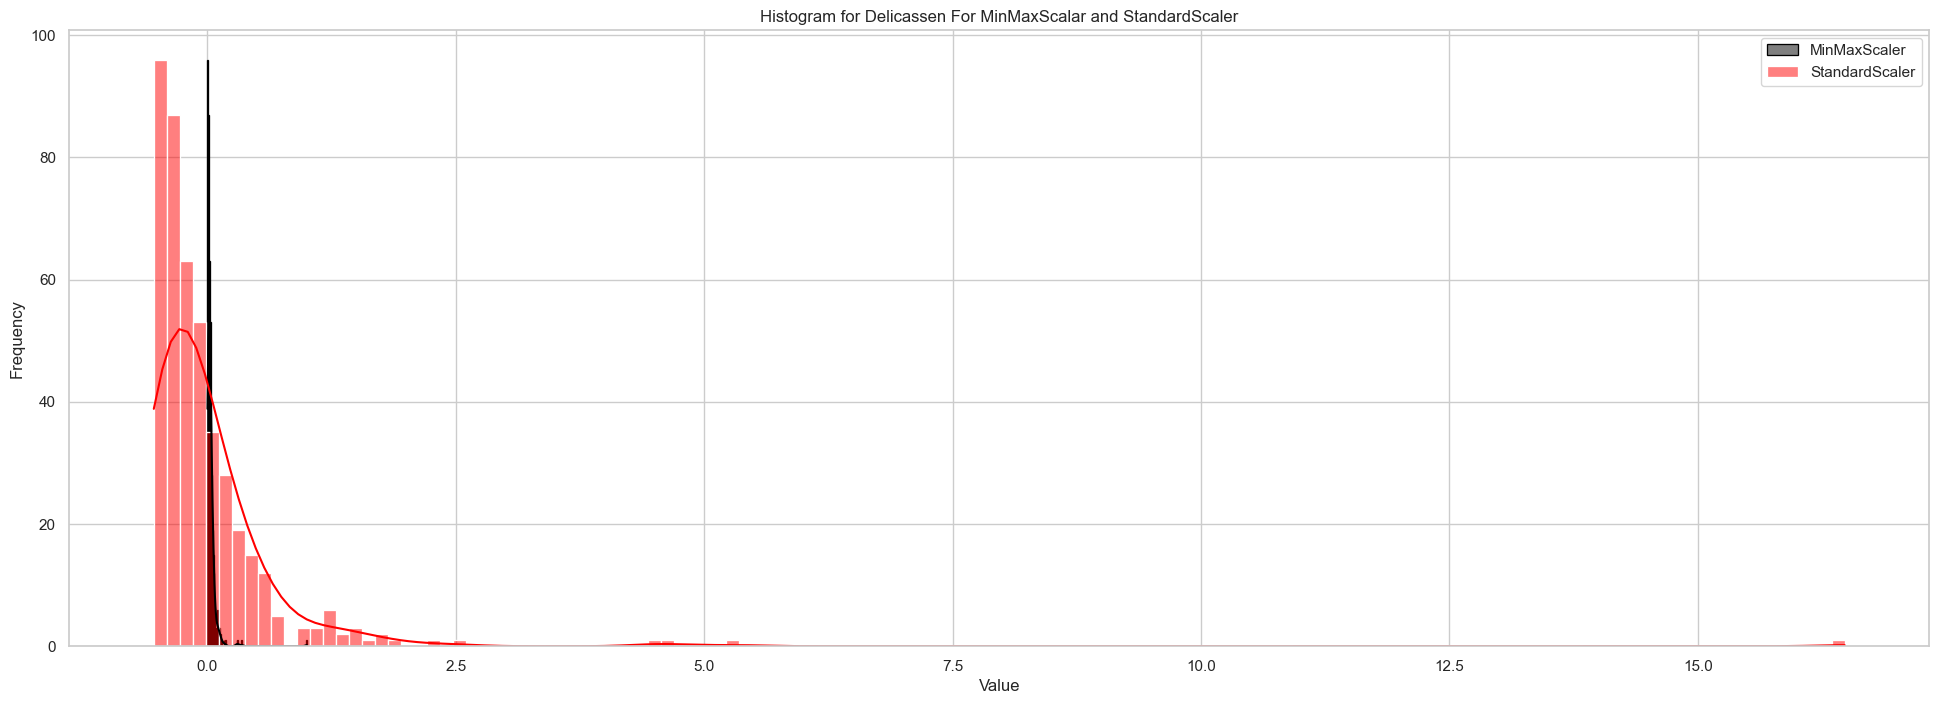

In [25]:
for col in features:
    plt.figure(figsize=(24, 8))

    sb.histplot(minmax_scaled_df[col], kde=True, color='black', edgecolor='black', label='MinMaxScaler')
    sb.histplot(standard_scaled_df[col], kde=True, color='red', label='StandardScaler')
    
    plt.title('Histogram for ' + col +  ' For MinMaxScalar and StandardScaler')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.show()

StandardScaler would be the appropriate choice. It ensures that each feature contributes equally to the analysis and prevents features with larger scales from dominating the others.

Therefore, based on the above analysis, the StandardScaler is best for the tasks such as RFECV, KMeans Clustering, PCA, and XGBoost Classifier, as it helps normalize the data, making it easier for these algorithms to work effectively and efficiently.

1. RFECV (Recursive Feature Elimination with Cross-Validation): This method ranks features according to their significance in predicting the target variable. Because it employs model fidelity as a metric, it is critical that all features have the same scale. StandardScaler ensures this by translating the data into a zero mean and unit variance.

2. KMeans Clustering: Because KMeans is a distance-based technique, its performance is affected by data size. StandardScaler is useful here since it assures that all features have the same scale, preventing a single characteristic from dominating the distance calculations.

3. PCA (Principal Component Analysis): PCA is a distance-based method that is affected by the data's scale. StandardScaler is commonly used before PCA to ensure that all features contribute evenly to the principal components.

4. XGBoost Classifier: While tree-based models such as XGBoost aren't influenced by data scale, utilizing StandardScaler can still be useful. It can be useful when regularizing your model because regularization is scale dependent.

# 

# Find optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score (use channel as target variable)

## convert "Channel" values into binary values

In [26]:
Y[Y == 2] = 0
Y[Y == 1] = 1

Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

## Splitting data into 80-20 train and test ratio

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard_scaled, Y, test_size=0.2, random_state=654)

print('Train Test split ratio is : [80, 20]','\n')
print("Training set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)


print("\nTesting set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

Train Test split ratio is : [80, 20] 

Training set:
X_train shape: (352, 7)
y_train shape: (352,)

Testing set:
X_test shape: (88, 7)
y_test shape: (88,)


## Checking the accuracy score for different types of classifiers.

In [28]:
print("Fit raw features:")
print("LR:", (LR.fit(X_train, Y_train).score(X_test, Y_test)*100))
print("KNN:", (KNN.fit(X_train, Y_train).score(X_test, Y_test)*100))
print("GBC: ", (GradientBoostingClassifier().fit(X_train, Y_train).score(X_test, Y_test)*100))
print("RFC: ", (RandomForestClassifier().fit(X_train, Y_train).score(X_test, Y_test)*100))


Fit raw features:
LR: 13.308365791136511
KNN: 89.77272727272727
GBC:  92.04545454545455
RFC:  92.04545454545455


#### From the above analysis going to RFC for feature selection.

## Applying RFECV using RFC(Random Forest Classifier)

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=65)
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_standard_scaled, Y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=65), scoring='accuracy')

In [30]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [31]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True])

In [32]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


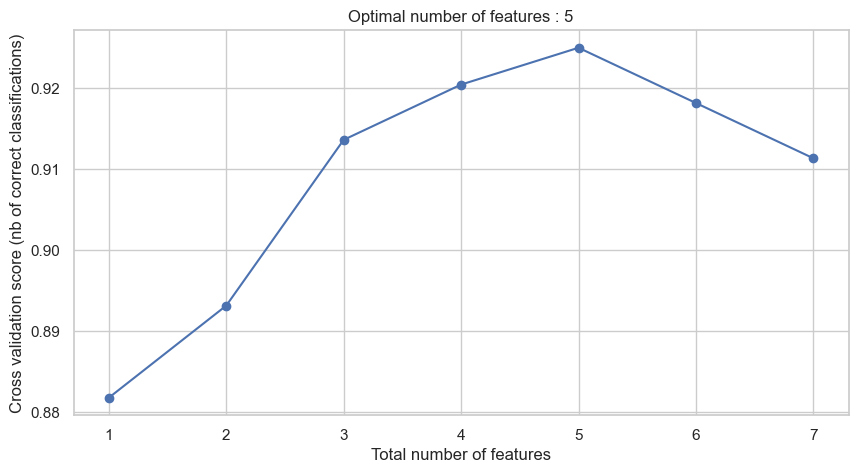

In [33]:
cv_score = rfecv.cv_results_['mean_test_score']

plt.figure(figsize=(10,5))
plt.xlabel("Total number of features")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_score) + 1), cv_score, marker='o', linestyle='-')
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

#### The graph illustrates the relationship between the total number of features and the cross-validation score for suitable classifications. The score increases in proportion to the total number of features, peaking at 5th features before falling. This indicates that the ideal number of features for this model is five. Beyond this limit, adding more features may cause overfitting and a drop in cross-validation score.

In [34]:
cv_index = np.argmax(cv_score)

selected_features_indices = rfecv.support_
selected_features = np.array(X.columns)[selected_features_indices]

print("Final Cross-Validation Score: " , round(cv_score[cv_index], 2))
print(f"Feature Importance : {selected_features}")

Final Cross-Validation Score:  0.92
Feature Importance : ['Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


# 

# Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters

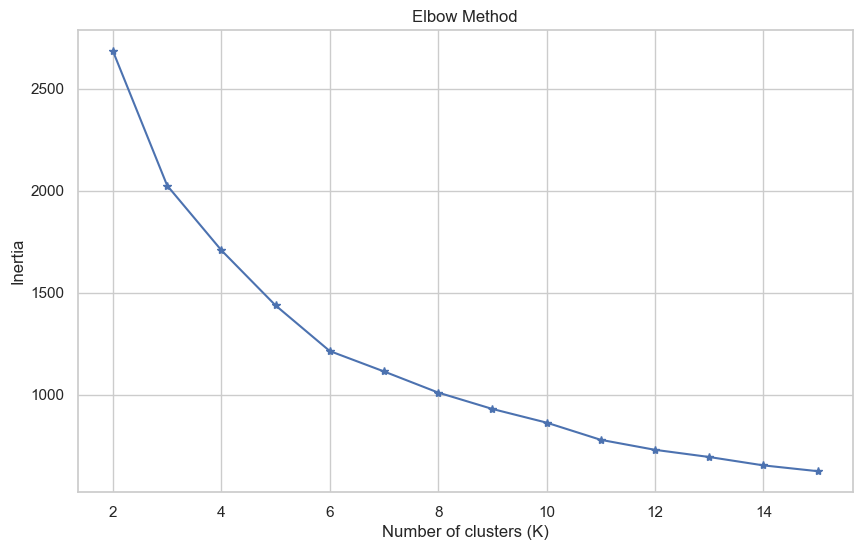

In [35]:
inertia = []
k_value = range(2, 16)
for i in k_value:
    k_means = KMeans(n_clusters=i, random_state=3)
    k_means.fit(X_standard_scaled)
    inertia.append(k_means.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_value, inertia, marker='*', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#### The graph depicts the Elbow Method, which determines the ideal number of clusters in a clustering process. The "elbow" point at K=6 indicates the optimum number of clusters.

# 

# Implement PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data 

In [36]:
from sklearn.decomposition import PCA

### PCA for 2 components

Variance explained by the first 2 components: 0.6215216384867819


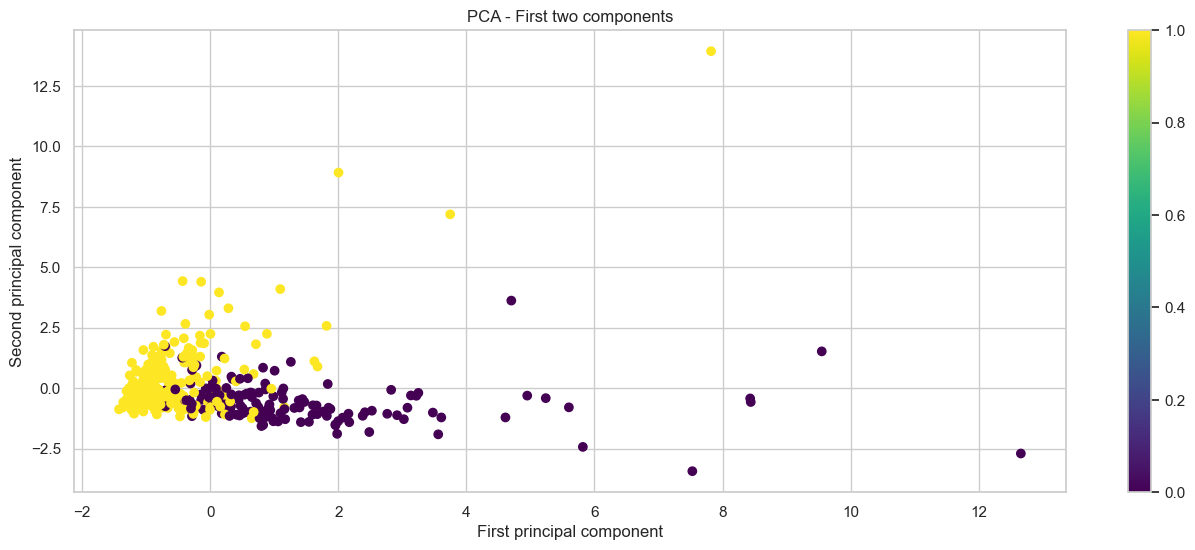

In [37]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_standard_scaled)

print(f"Variance explained by the first 2 components: {sum(pca_2.explained_variance_ratio_[:2])}")

# Visualize the first two components
plt.figure(figsize=(16, 6))

# Plot for the first two components
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=Y, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA - First two components')
plt.colorbar()


#### The scatter plot visualizes data points using the first two principal components from PCA. The color bar indicates that 62.15% of the variance is explained by these two components.

### PCA for 4 components

Variance explained by the first 4 components: 0.8707134131129592


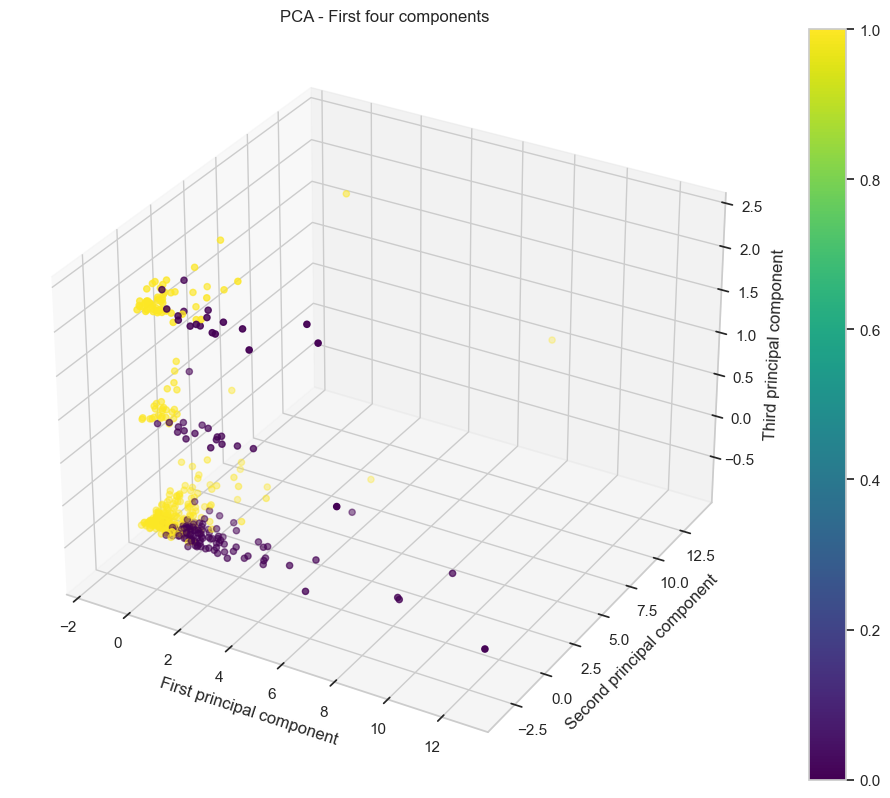

In [38]:

pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(X_standard_scaled)


print(f"Variance explained by the first 4 components: {sum(pca_4.explained_variance_ratio_[:4])}")

fig = plt.figure(figsize=(20, 8))

# Plot for the first four components
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(X_pca_4[:, 0], X_pca_4[:, 1], X_pca_4[:, 2], c=Y, cmap='viridis')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax2.set_zlabel('Third principal component')
ax2.set_title('PCA - First four components')
plt.colorbar(scatter2)

plt.tight_layout()
plt.show()

#### The 3D scatter plot depicts data points using the first three principal components of PCA. The color bar represents the coefficient values for the fourth major component. The first four components account for approximately 87% of the variance. There are two unique sets of data points visible.

## Pair plot for all components

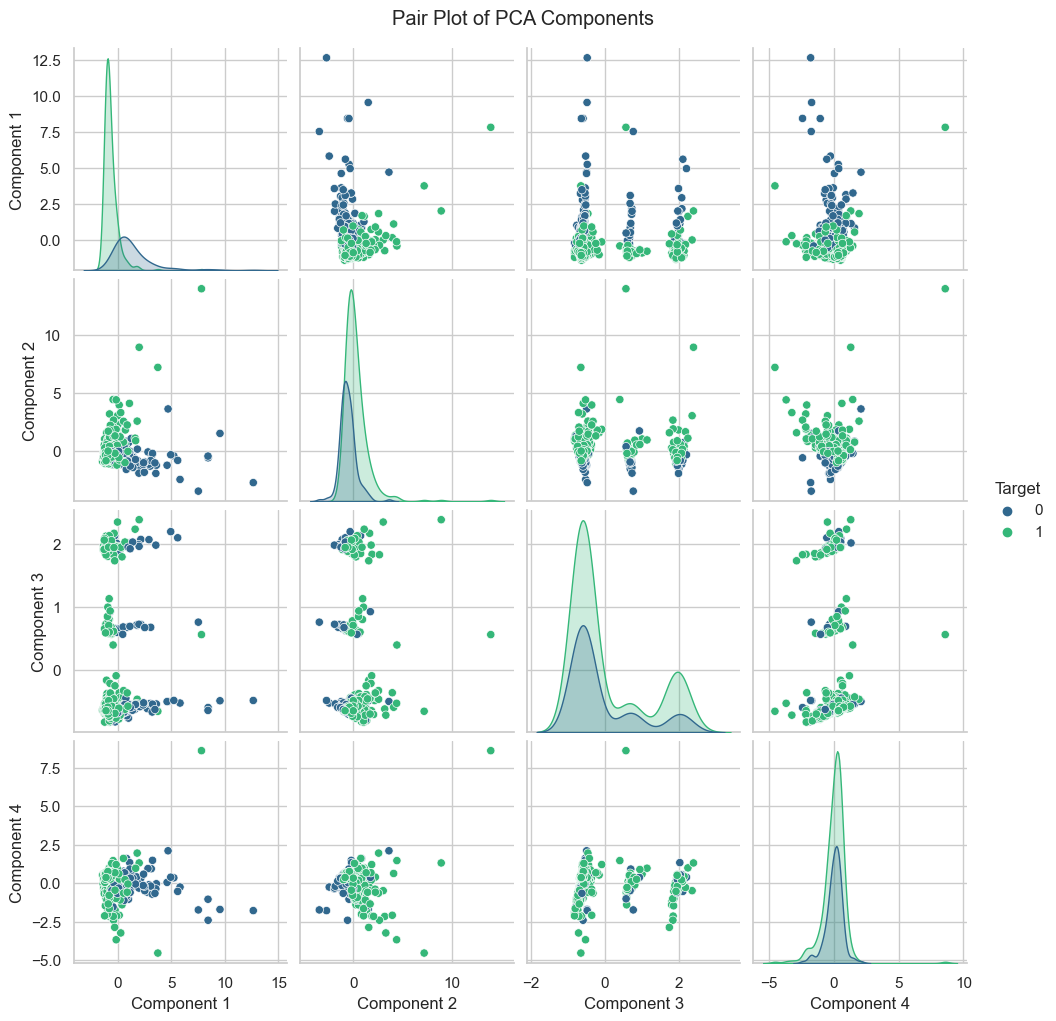

In [39]:
df_pca = pd.DataFrame(data=X_pca_4, columns=[f"Component {i+1}" for i in range(4)])

df_pca['Target'] = Y  
sb.pairplot(df_pca, hue='Target', palette='viridis')
plt.suptitle('Pair Plot of PCA Components', y=1.02)
plt.show()

#### The pair plot of PCA components depicts the correlations between distinct components as well as the data point distribution for two target classes (0 and 1). The histograms on the diagonal display various patterns and separations for each target class, suggesting data variability. The scatter plots show various patterns and clusters, indicating links between the PCA components for each target class. The color coding differentiates between the two target classes. This visualization might help you comprehend the structure and relationships within the data.

# 

# Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [44]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(xgb, X_train, Y_train, cv=kfold)

print(f"Cross Val Accuracy: {np.mean(scores)*100}")

xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print(f"Precision: {precision_score(Y_test, Y_pred, average='macro')*100}")
print(f"Recall: {recall_score(Y_test, Y_pred, average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test, Y_pred, average='macro')*100}")
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix :", '\n', confusion_matrix(Y_test,Y_pred))

Cross Val Accuracy: 92.32595573440643
Precision: 90.6896551724138
Recall: 89.50892857142857
F1 Score: 90.03961516694963
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.91      0.95      0.93        56

    accuracy                           0.91        88
   macro avg       0.91      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88

Confusion Matrix : 
 [[27  5]
 [ 3 53]]


1. Metrics:

The model’s performance is assessed using several metrics, including:

Accuracy: Approximately 92.32%.

Precision: Around 90.68%.

Recall: Approximately 89.50%.

F1 Score: About 90.03%.

These metrics help evaluate how well the model performs in terms of correctly classifying instances.

2. Class Labels:

The model is likely performing a binary classification task, as there are two classes labeled as “0” and “1.”

The precision, recall, and F1-score are reported separately for each class.

3. Support:

The “support” values indicate the number of instances in each class used for evaluation.

4. Macro and Weighted Averages:

The macro average and weighted average scores provide an overall assessment across both classes.

The macro average considers each class equally, while the weighted average accounts for class imbalance.

In summary, this model demonstrates strong performance, especially in terms of recall and precision. And these results are specific to the dataset and task at hand.

